In [1]:
#Used packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

#Reading in the csv file and saving it into a pandas dataframe

bank_data = pd.read_csv('Bank_Dataset/bank-additional-full.csv', sep=';')

#Checking the first 20 observations in the data

bank_data.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
#Obtaining some general infos
print(bank_data.shape)

#The dataset contains 21 columns (20 explanatory variables and 1 target) as well as 41188 observations

#Checking the columns in the data set
print(bank_data.columns)


#Checking the distribution of the target variable
target_count = bank_data.groupby(["y"])["y"].count()
print(target_count)

#There are 36548 observations where the client did not subscribe to a term deposit. There are 4640 observation where he did subscibe. 
#36548 + 4640 = 41188, so no missing data in the target variable

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
y
no     36548
yes     4640
Name: y, dtype: int64


In [3]:
#Checking out missing values in each column, according the description for most columns missing values are classified as 'Unknown'
#I am checking for na values as well
n_obs = bank_data.count()

sum(bank_data["age"].isna())

0

In [4]:
#Checking out the column types

for col in bank_data.columns:
    data_type = bank_data[col].dtype
    print("colname: " + col + "  data type: " + str(data_type))

#categorical variables are of type object, the numeric ones are of type int64 or float64 depending on whether it is an integer or a double.

categorical_cols = [col for col in bank_data.columns if str(bank_data[col].dtype) == "object"]
numeric_cols = [col for col in bank_data.columns if str(bank_data[col].dtype) != "object"]

print(categorical_cols)
print(len(categorical_cols) + len(numeric_cols))

colname: age  data type: int64
colname: job  data type: object
colname: marital  data type: object
colname: education  data type: object
colname: default  data type: object
colname: housing  data type: object
colname: loan  data type: object
colname: contact  data type: object
colname: month  data type: object
colname: day_of_week  data type: object
colname: duration  data type: int64
colname: campaign  data type: int64
colname: pdays  data type: int64
colname: previous  data type: int64
colname: poutcome  data type: object
colname: emp.var.rate  data type: float64
colname: cons.price.idx  data type: float64
colname: cons.conf.idx  data type: float64
colname: euribor3m  data type: float64
colname: nr.employed  data type: float64
colname: y  data type: object
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
21


In [5]:

n_obs = len(bank_data)

#For the categorical values I am checking unknown levels as well
na_perc = {}


for col in categorical_cols:
    na_count = sum(bank_data[col].isna())
    unknown_count = sum(bank_data[col] == 'unknown')
    print(col + ":  na-share: " + str(round(na_count/n_obs,3)) + ",  unknown-share: " + str(round(unknown_count/n_obs,3)))

#No categorical variable has missing values in terms of na, housing and loan have about 2.4 % unknown values, education have 4.2 % unknowns
#Default has 21% unknowns



job:  na-share: 0.0,  unknown-share: 0.008
marital:  na-share: 0.0,  unknown-share: 0.002
education:  na-share: 0.0,  unknown-share: 0.042
default:  na-share: 0.0,  unknown-share: 0.209
housing:  na-share: 0.0,  unknown-share: 0.024
loan:  na-share: 0.0,  unknown-share: 0.024
contact:  na-share: 0.0,  unknown-share: 0.0
month:  na-share: 0.0,  unknown-share: 0.0
day_of_week:  na-share: 0.0,  unknown-share: 0.0
poutcome:  na-share: 0.0,  unknown-share: 0.0
y:  na-share: 0.0,  unknown-share: 0.0


In [6]:
#Now lets check the numeric variables
for col in numeric_cols:
    na_count = sum(bank_data[col].isna())
    print(col + ":  na-share: " + str(round(na_count/n_obs,3)))

#Non of the numeric values seem to have obvious missing values, maybe there are some hidden missing values, masked as 0. 
#Lets check the variance as well

bank_data.var(numeric_only =True)

#There seems to be some variance among the numeric varialbes, variables with 0 variance would not have been useful

age:  na-share: 0.0
duration:  na-share: 0.0
campaign:  na-share: 0.0
pdays:  na-share: 0.0
previous:  na-share: 0.0
emp.var.rate:  na-share: 0.0
cons.price.idx:  na-share: 0.0
cons.conf.idx:  na-share: 0.0
euribor3m:  na-share: 0.0
nr.employed:  na-share: 0.0


age                 108.602451
duration          67225.728877
campaign              7.672975
pdays             34935.687284
previous              0.244927
emp.var.rate          2.467915
cons.price.idx        0.335056
cons.conf.idx        21.420215
euribor3m             3.008308
nr.employed        5220.283250
dtype: float64

In [7]:
#In the next section I will investigate the relationship between the categorical variables and the response variable. 
#However since this already has influence on the modelling decisions, I will split the data into a training and test sample first

import numpy as np
np.random.seed(169)

#Converting the target varialbe to 1 and 0 

bank_data["target"] = bank_data["y"].map({"yes":1,"no":0})

share_of_train = 0.7
train_ind = np.random.rand(n_obs) < share_of_train

bank_data_train = bank_data[train_ind]
bank_data_test = bank_data[~train_ind]
print(bank_data_train.shape)
print(bank_data_test.shape)



(28913, 22)
(12275, 22)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


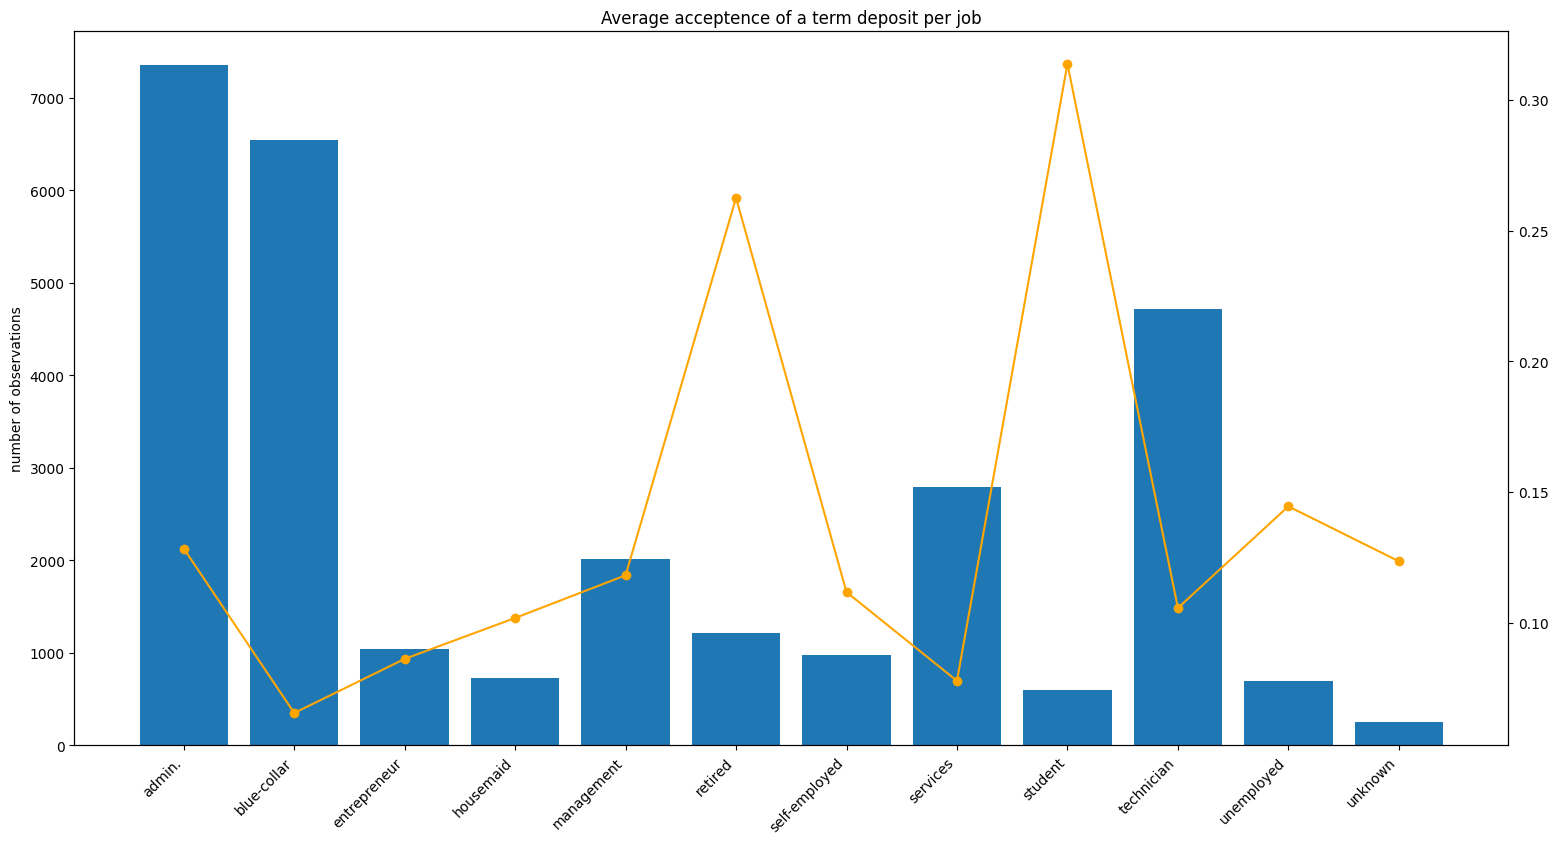

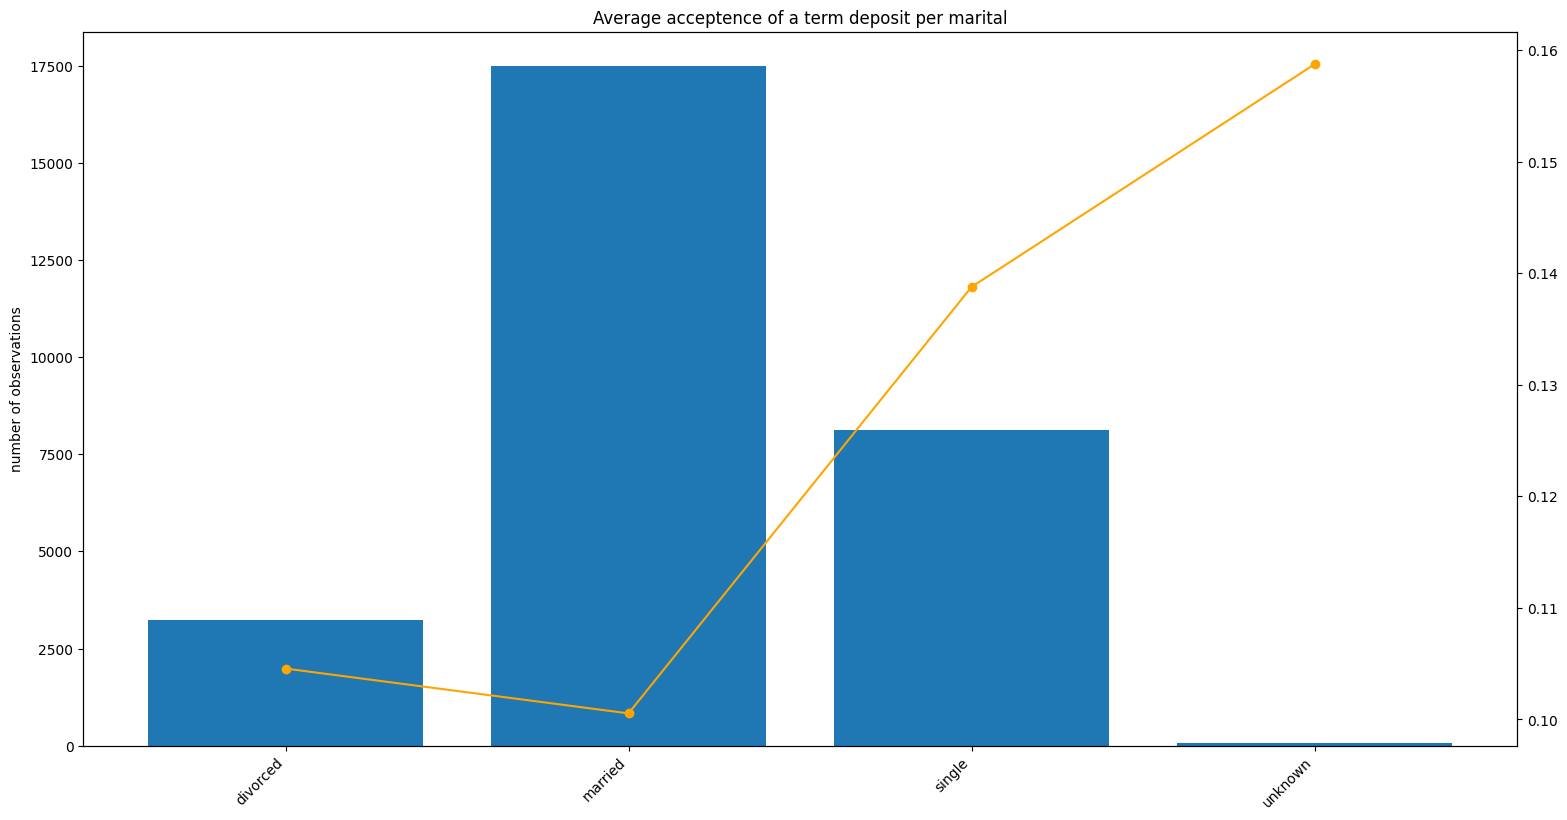

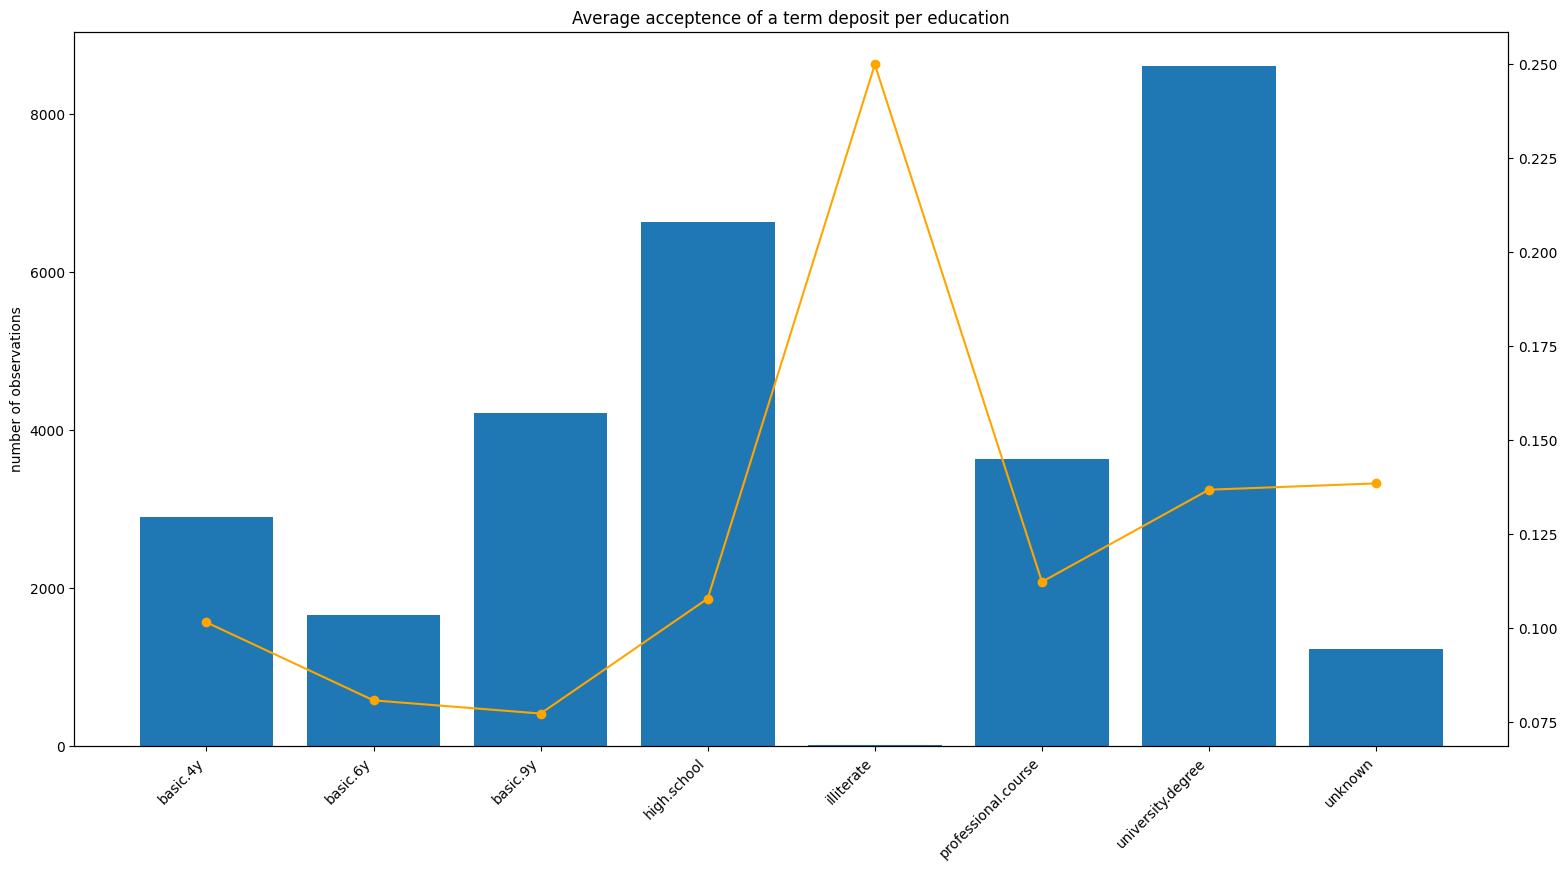

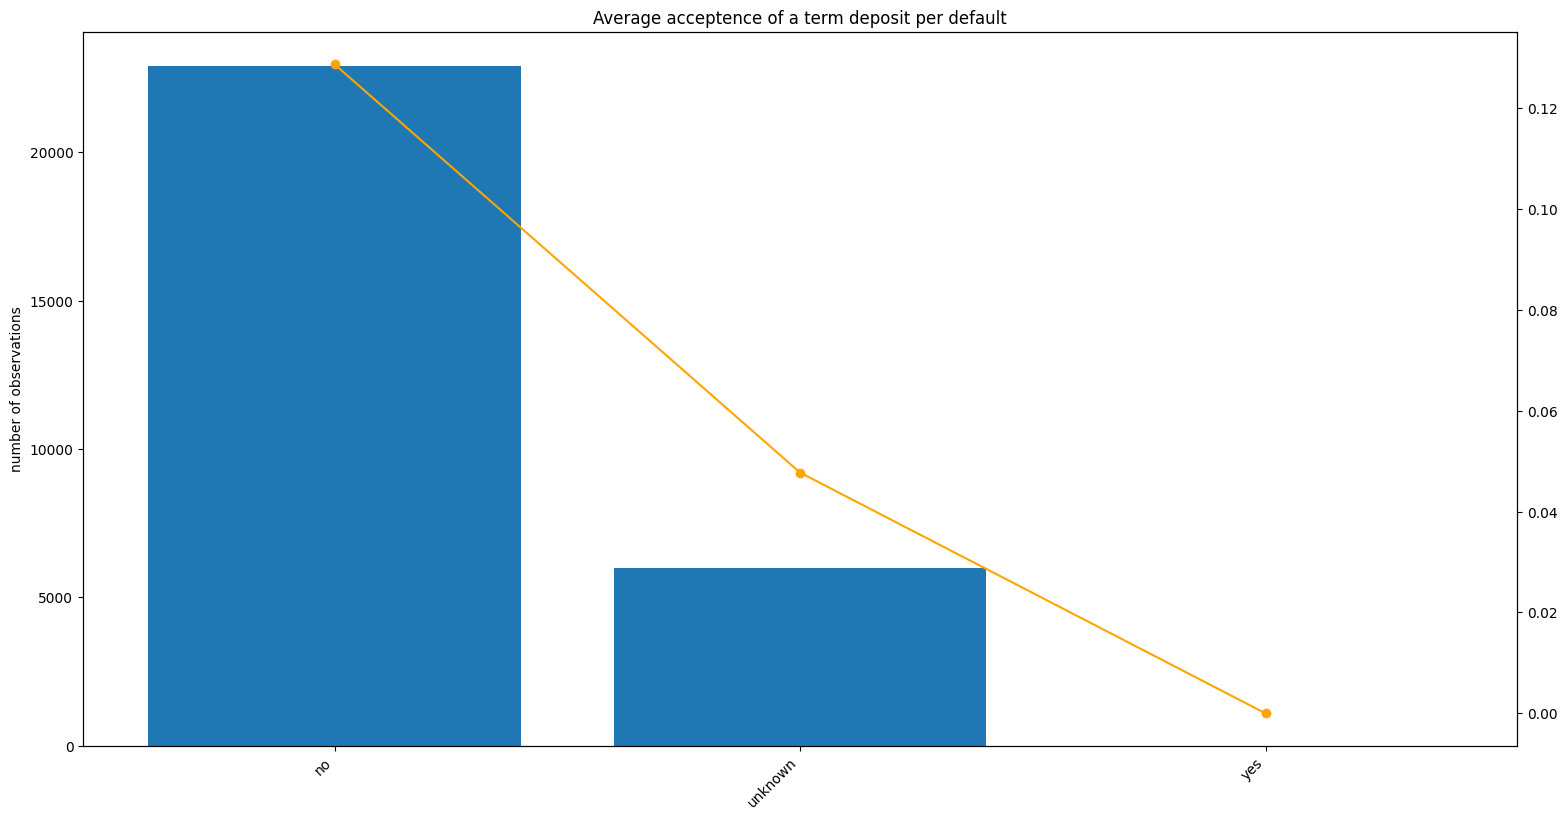

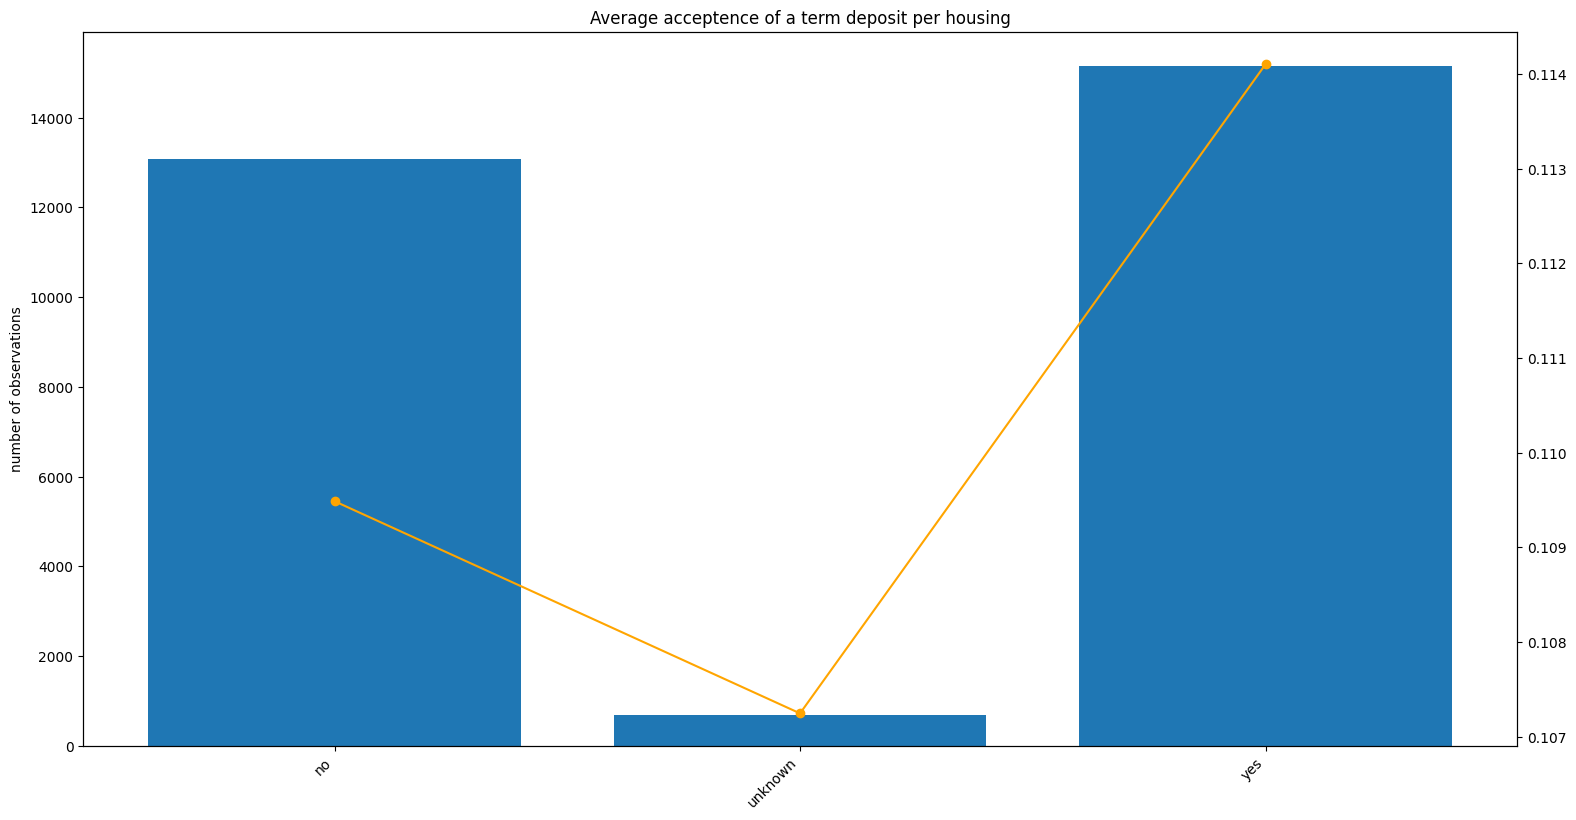

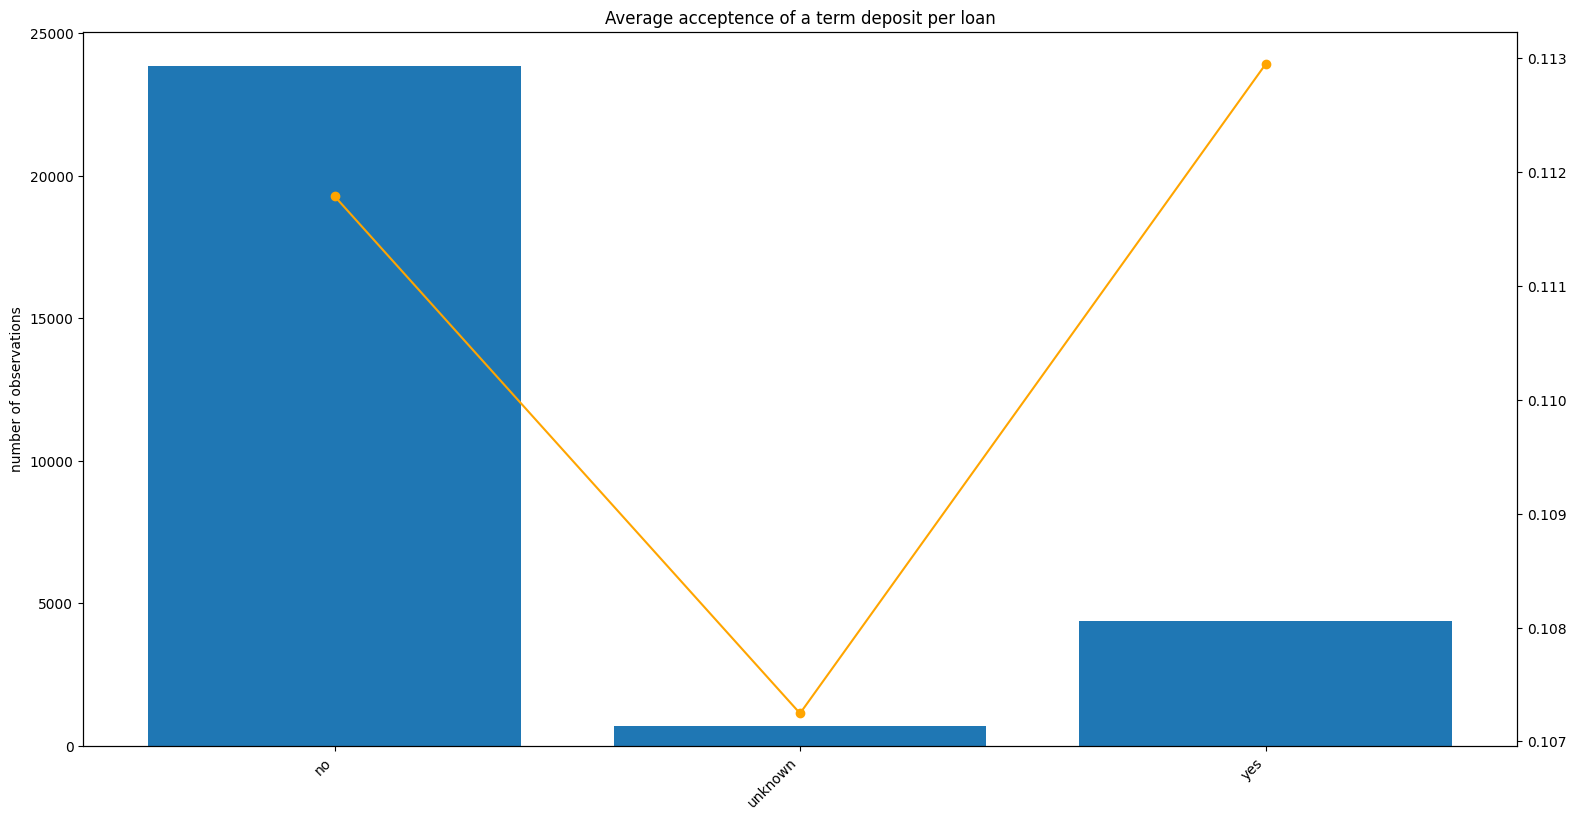

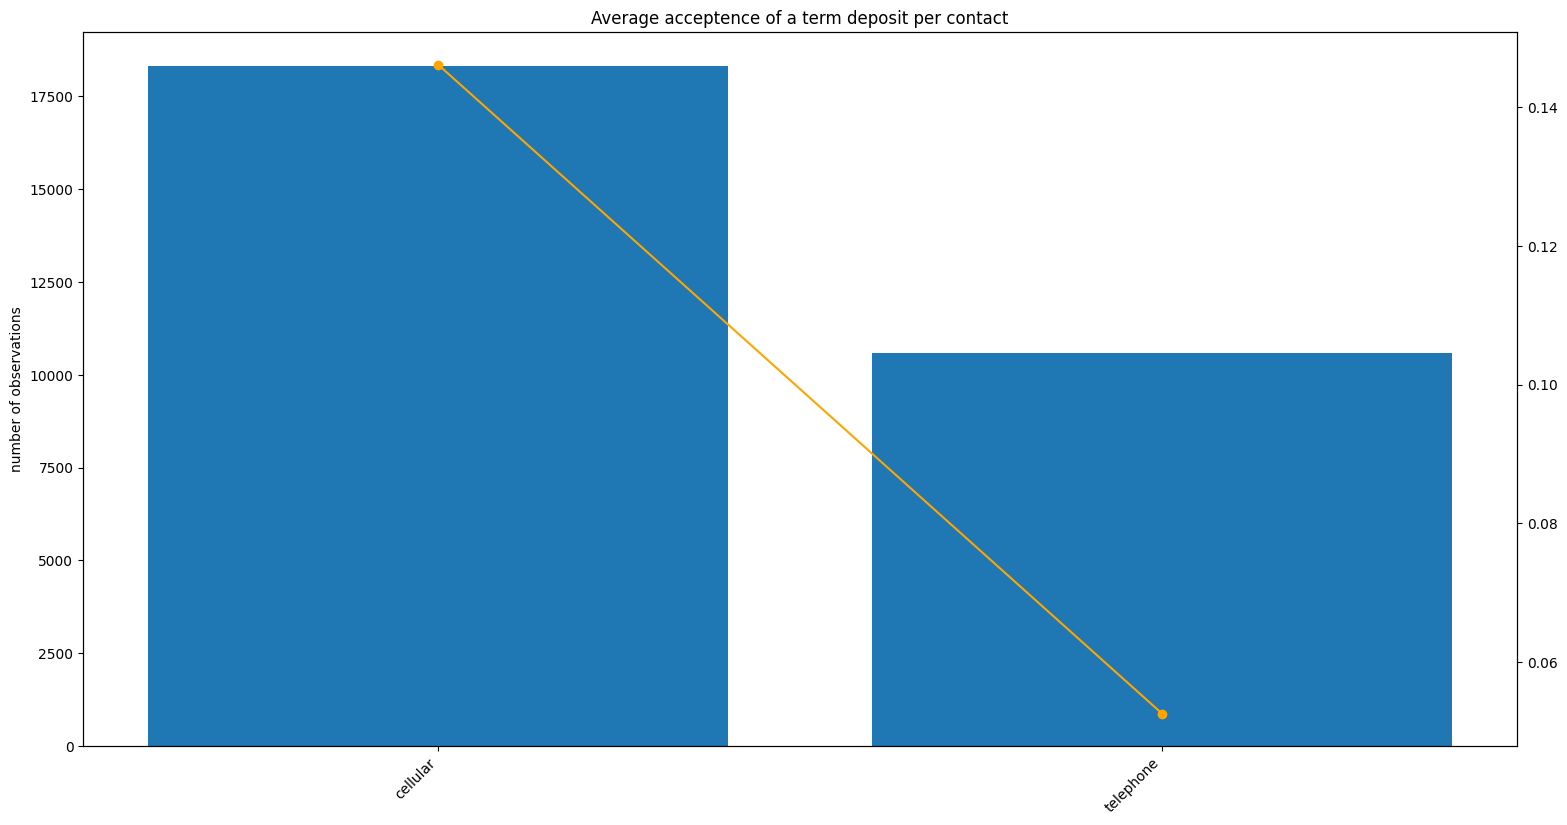

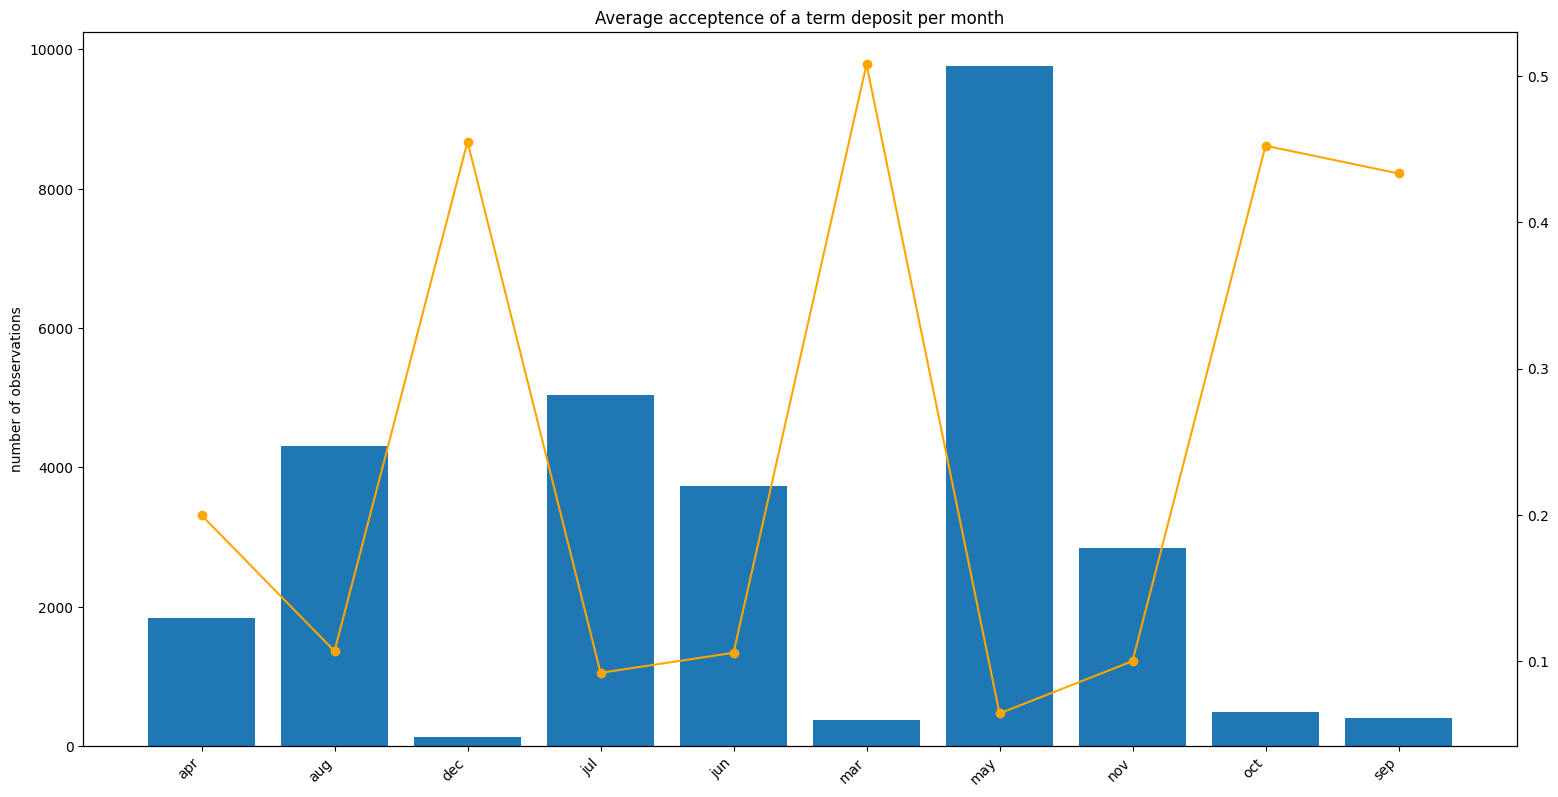

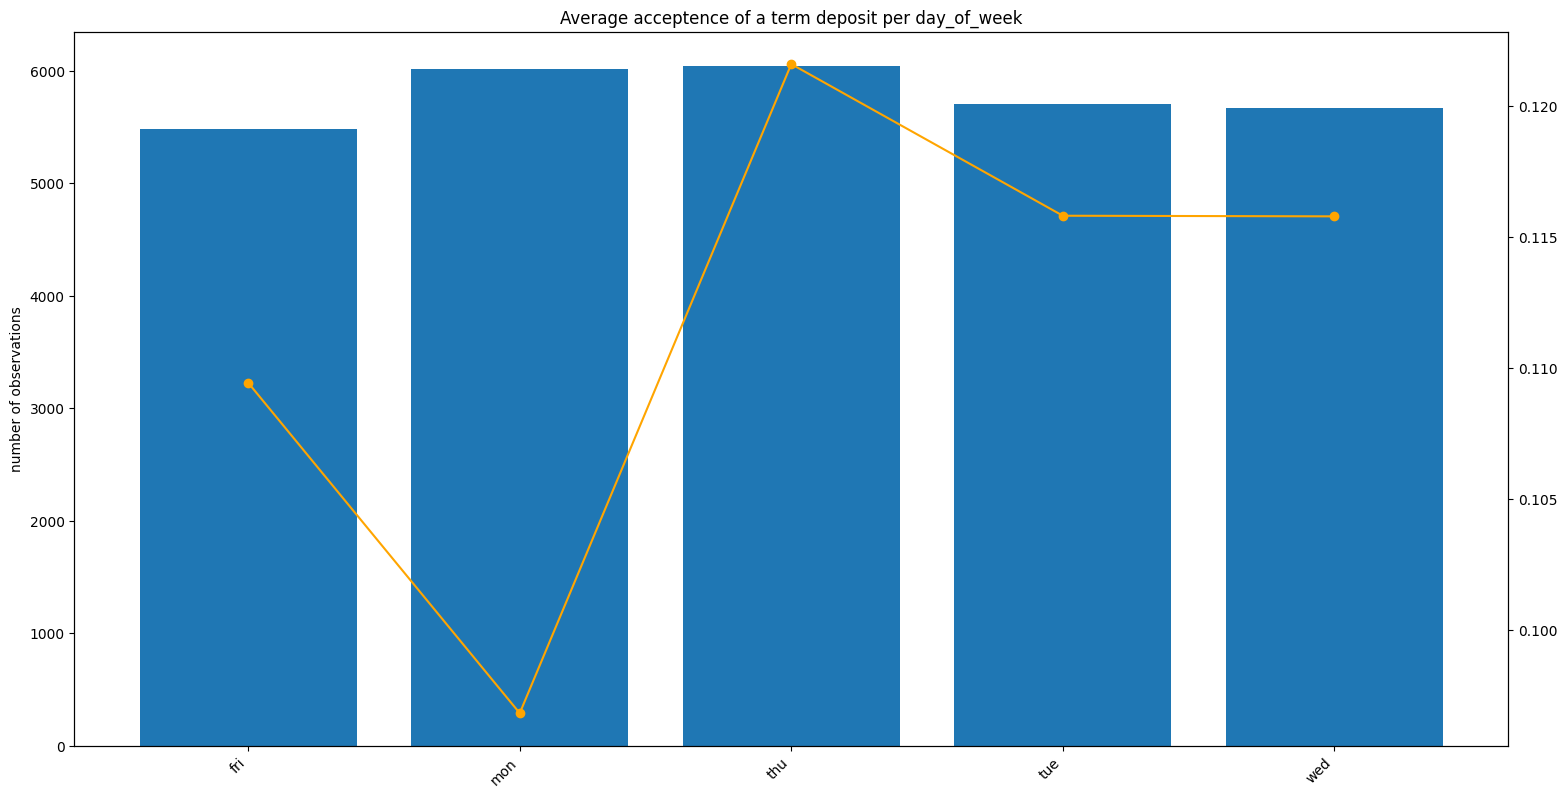

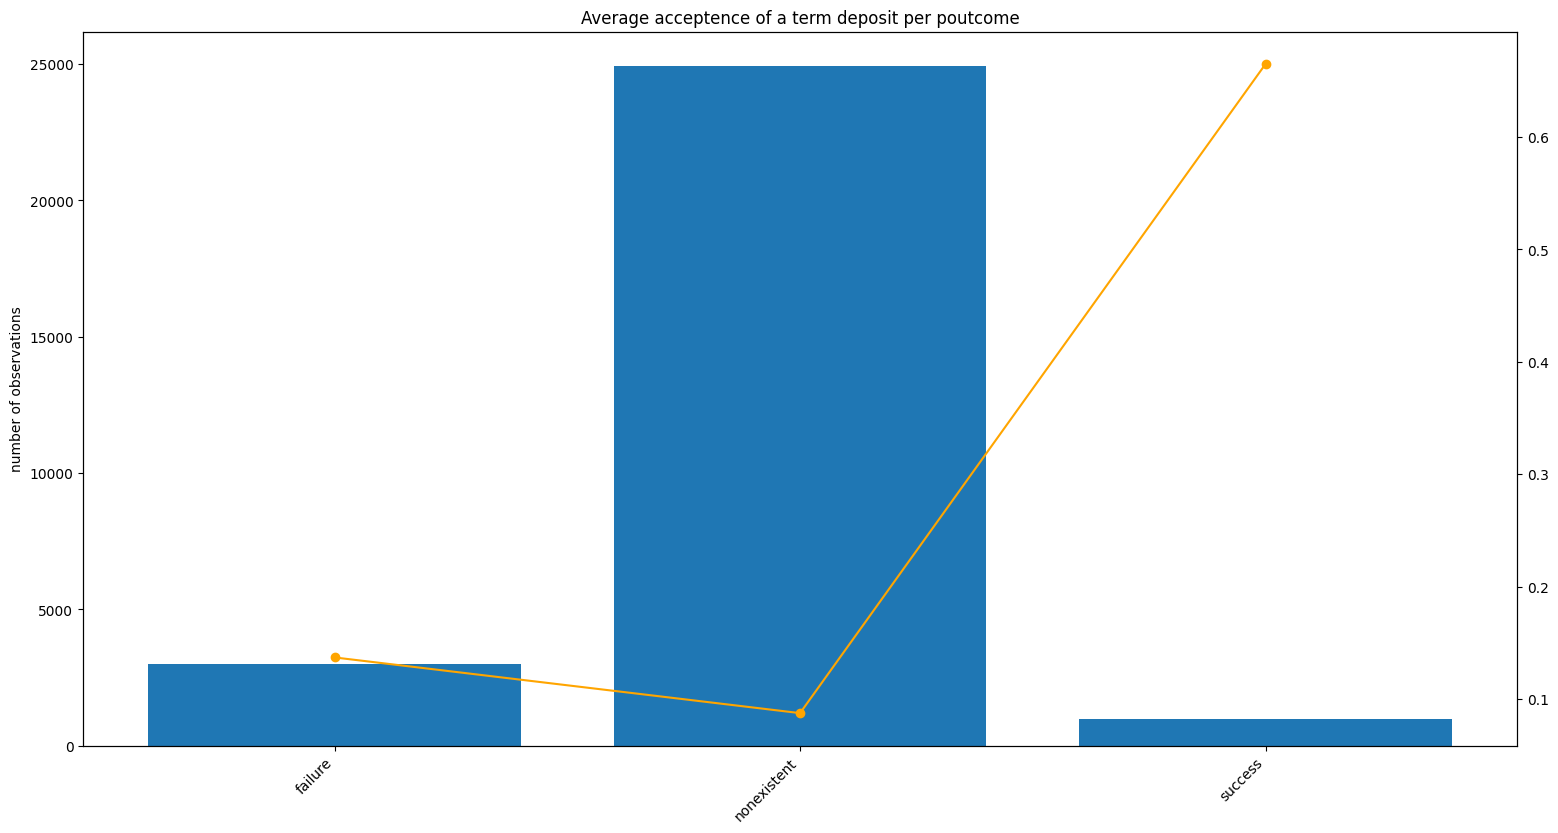

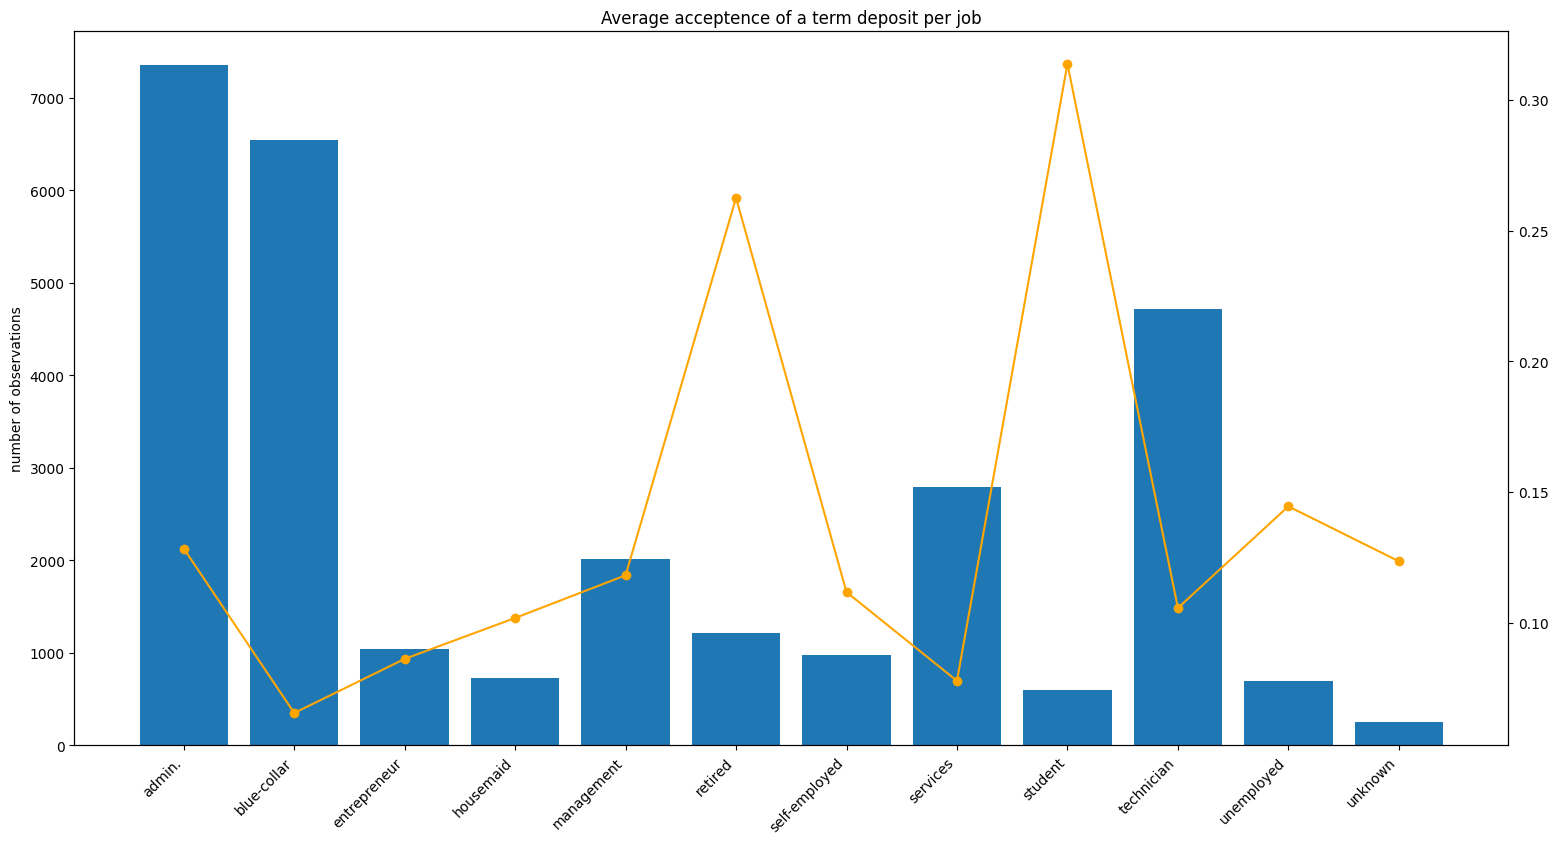

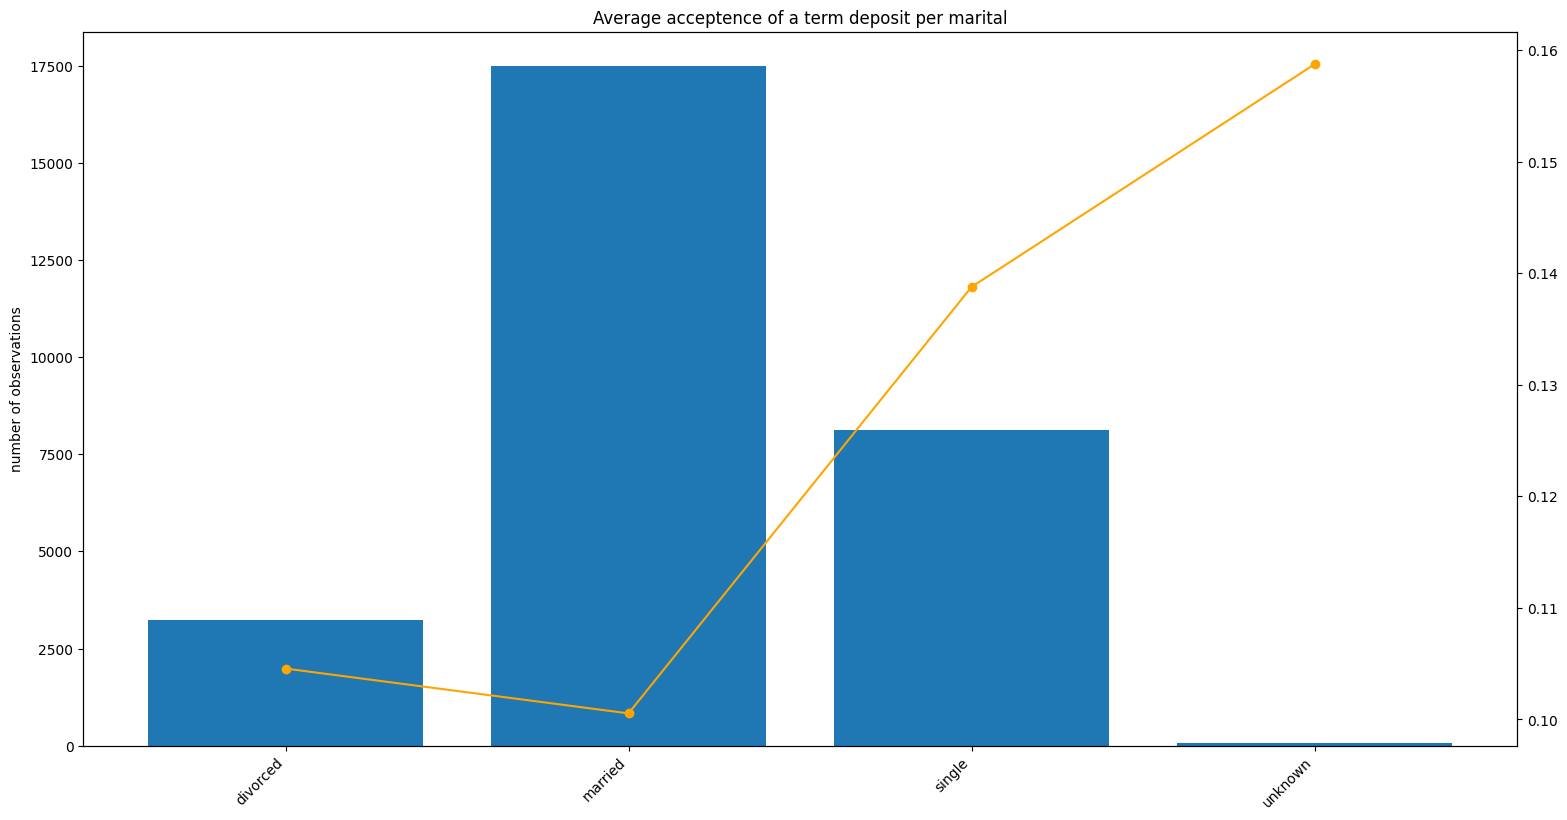

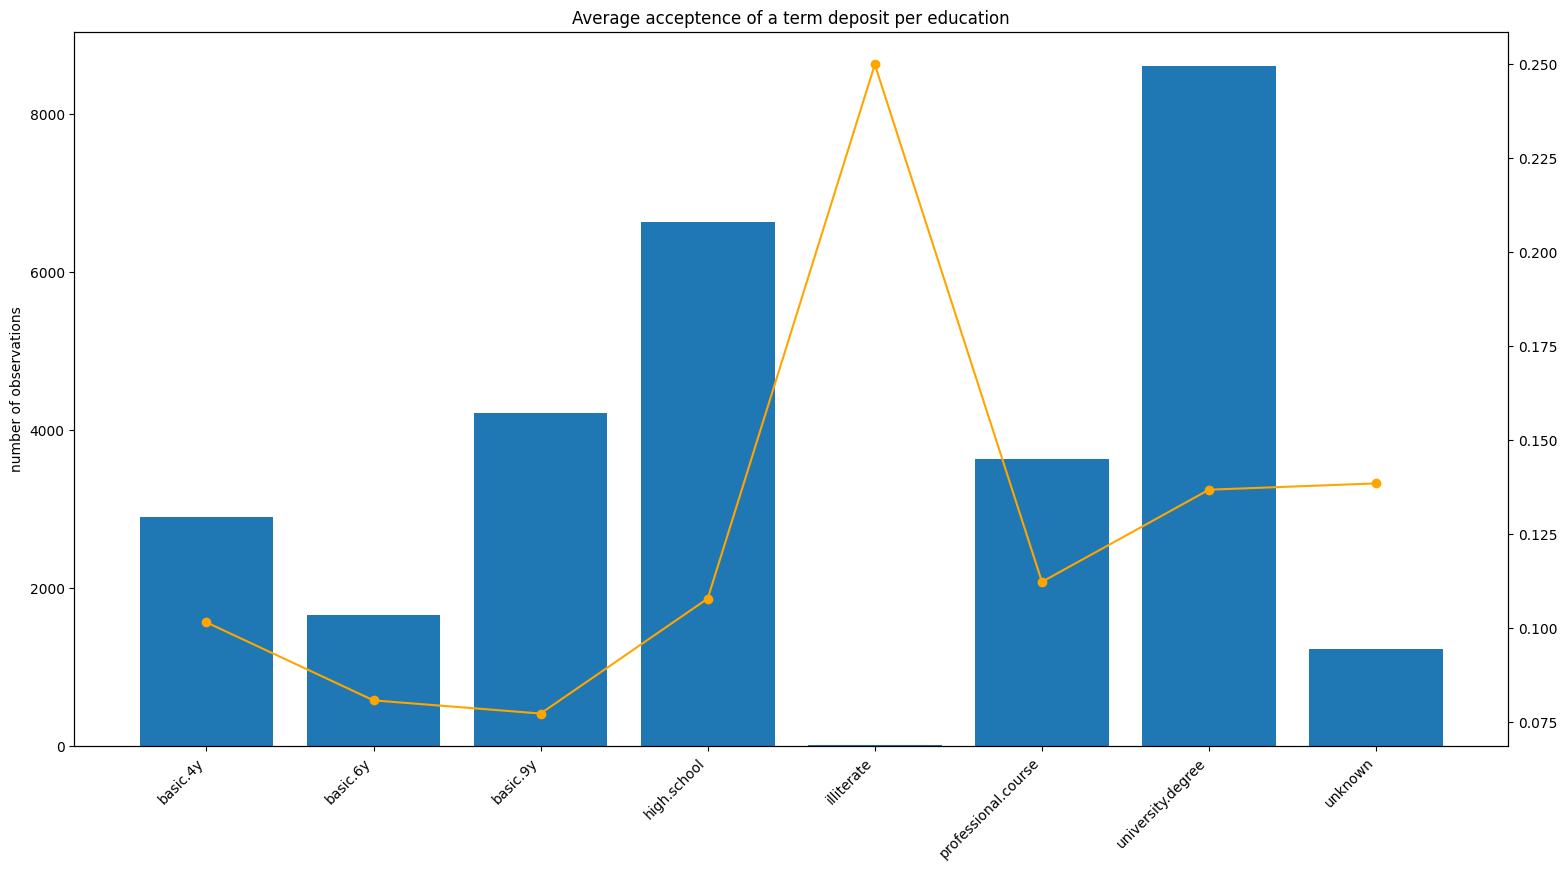

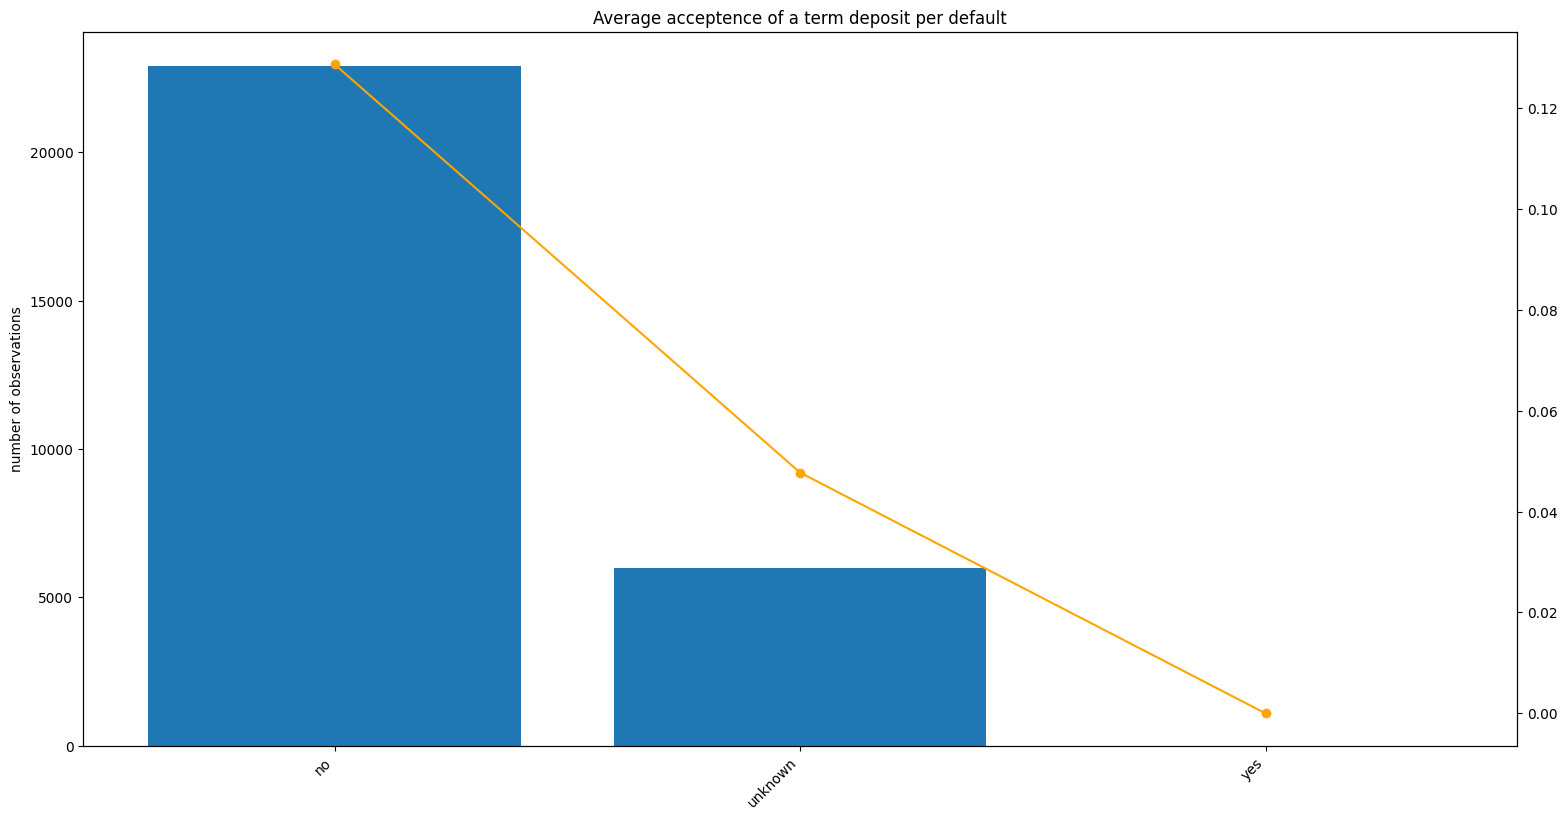

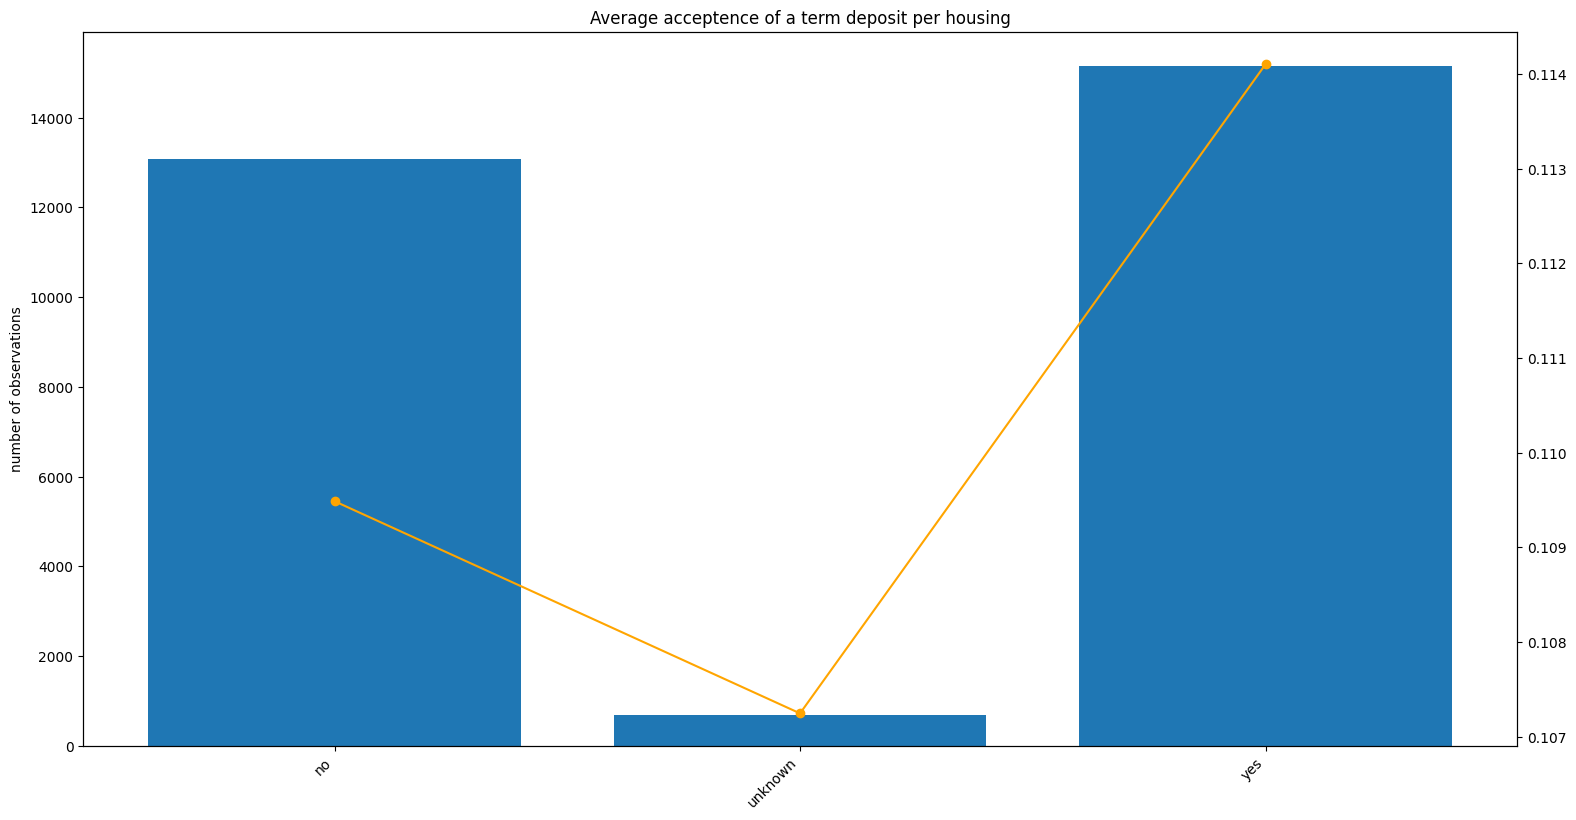

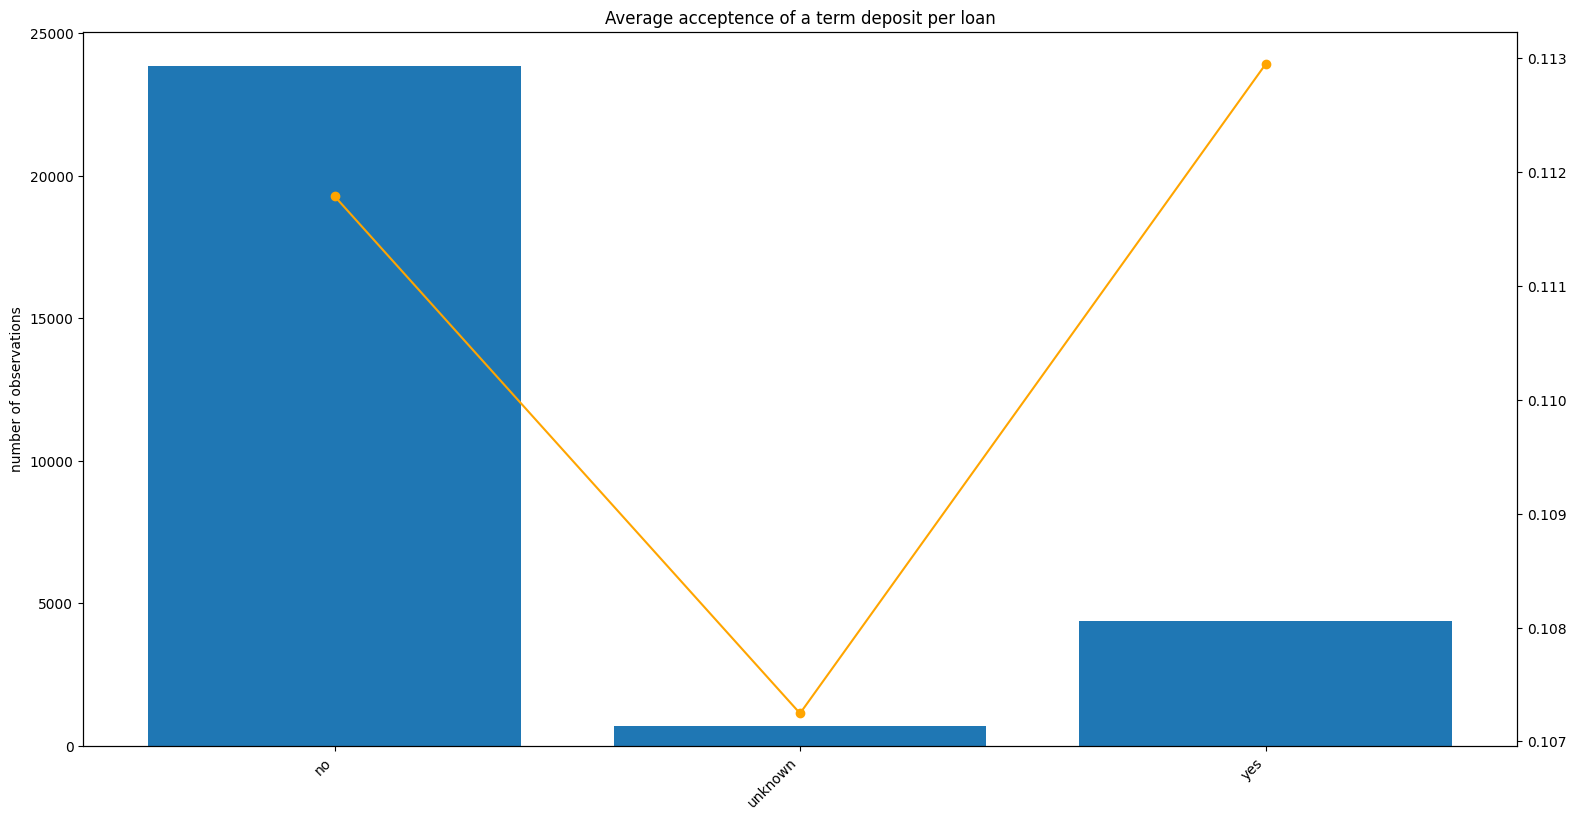

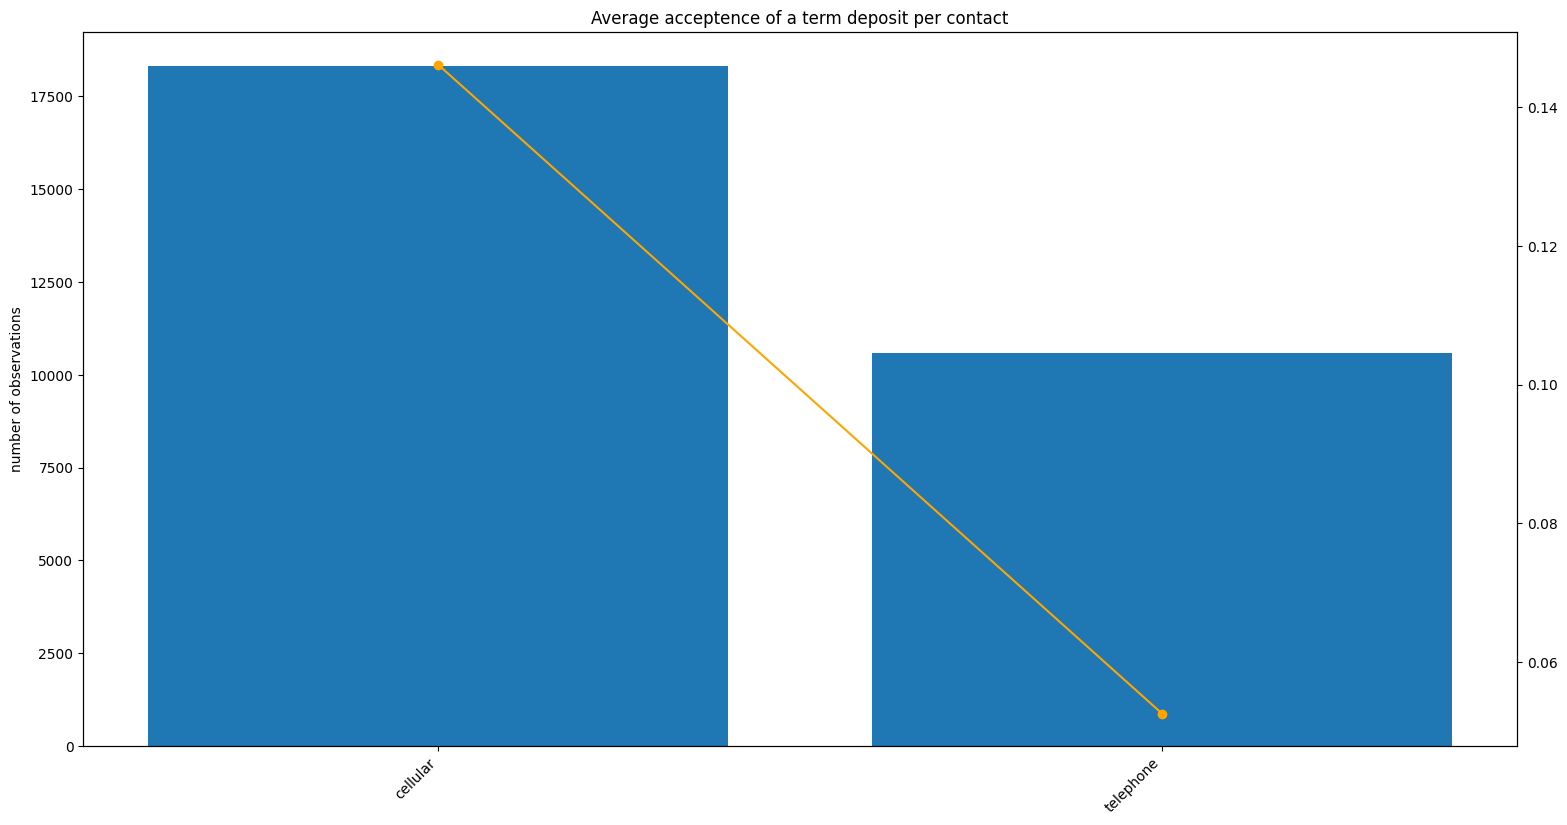

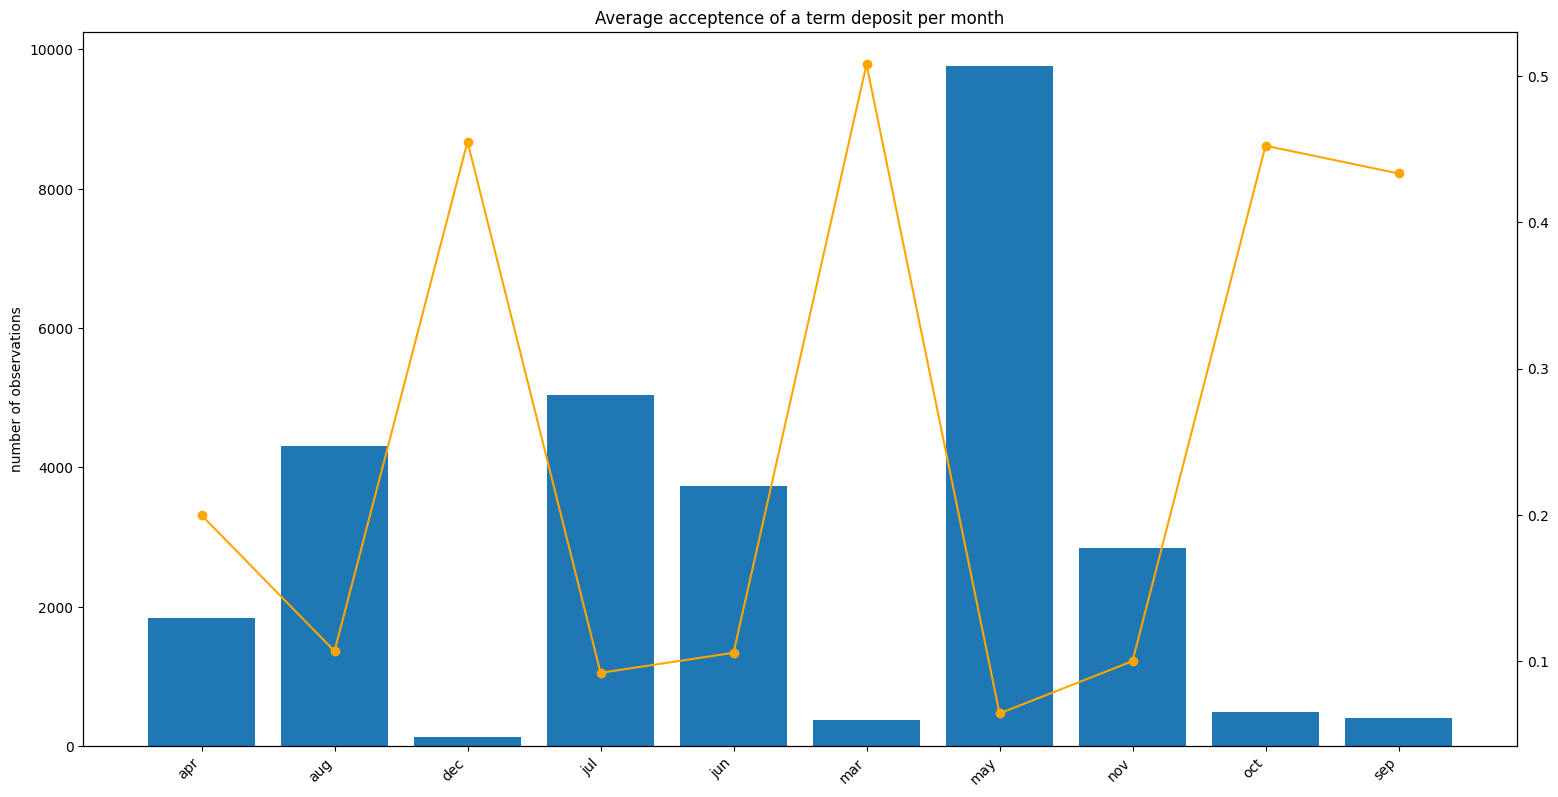

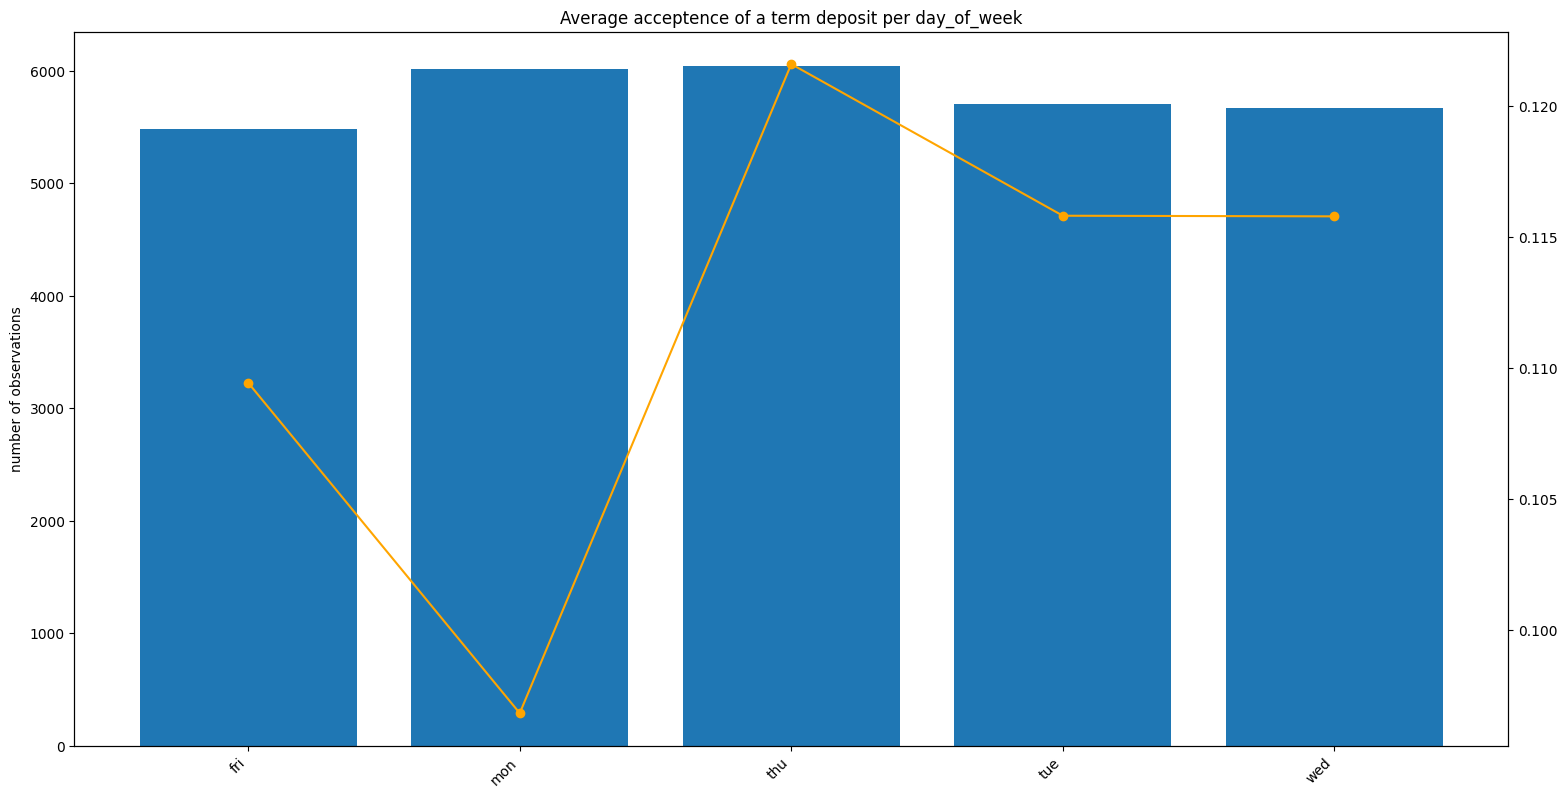

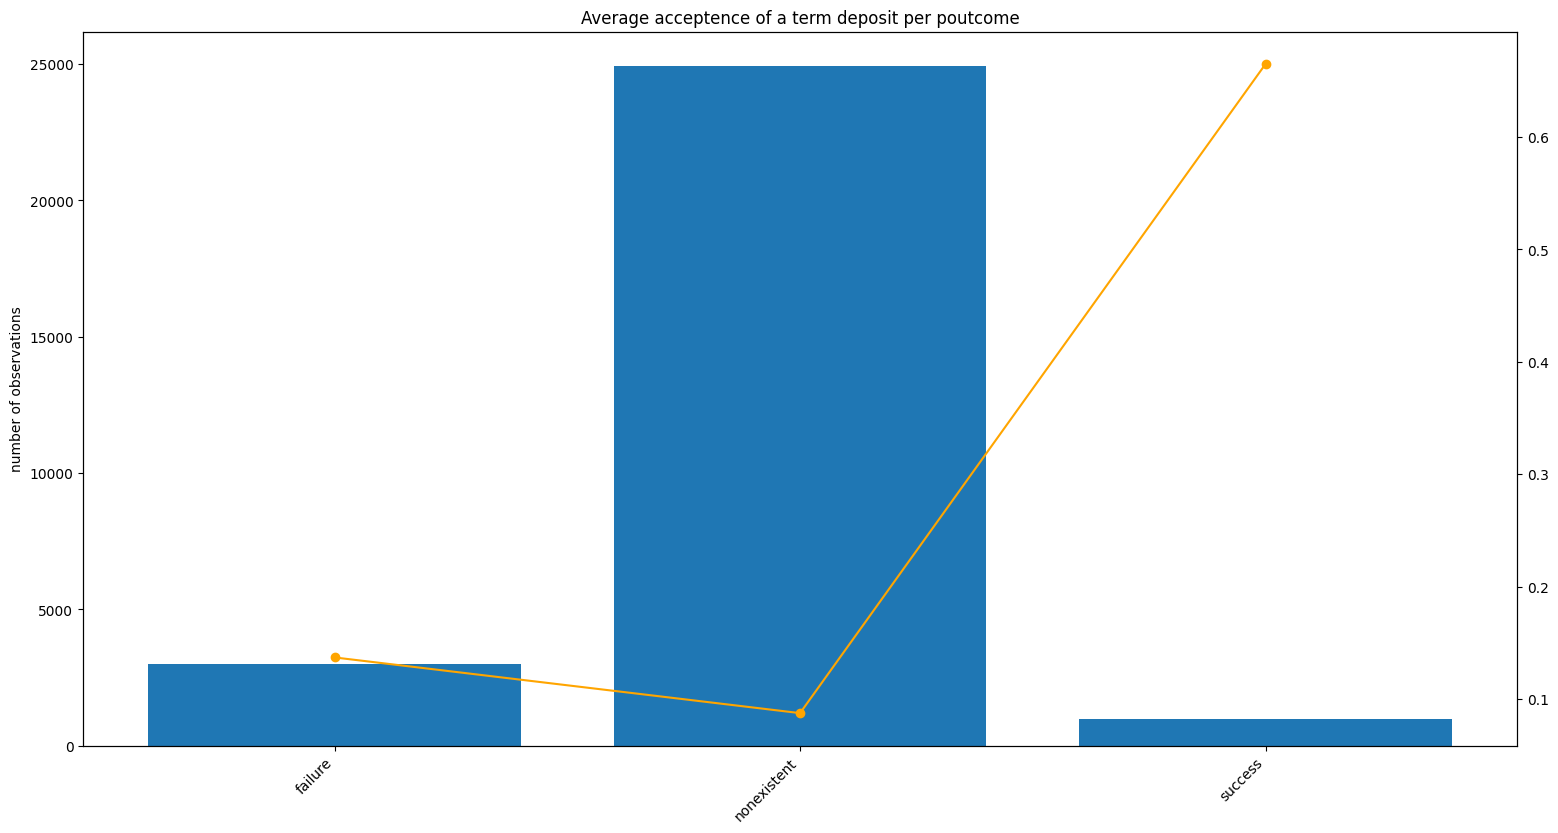

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.pyplot.ioff()

def plot_col_vs_target(col):
    cnt = bank_data_train.groupby([col])["target"].count()
    average = bank_data_train.groupby([col])["target"].mean()

    labels = [str(lab) for lab in average.axes[0]]
    av_values = average.tolist()
    cnt_values = cnt.tolist()

    fig, ax1 = plt.subplots()
    ax1.bar(labels, cnt_values)
    ax1.set_ylabel("number of observations")

    ax2 = ax1.twinx()
    ax2.set_title("Average acceptence of a term deposit per " + col)
    ax2.plot(labels, av_values, color = "orange", marker = "o")

    fig.autofmt_xdate(rotation=45)
    fig.set_size_inches(18.5,10.5)
    display(fig)


print(categorical_cols)


plot_col_vs_target('job')
plot_col_vs_target('marital')
plot_col_vs_target('education')
plot_col_vs_target('default')
plot_col_vs_target('housing')
plot_col_vs_target('loan')
plot_col_vs_target('contact')
plot_col_vs_target('month')
plot_col_vs_target('day_of_week')
plot_col_vs_target('poutcome')

In [9]:
a = pd.qcut(bank_data_train["age"],10)
y = bank_data_train["target"]
df=pd.concat([a,y],axis=1)

def plot_numcol_vs_target(col,n_cuts=10):
    col_into_quantiles = pd.qcut(bank_data_train[col],n_cuts)
    target = bank_data_train["target"]

    helper_df = pd.concat([col_into_quantiles, target], axis=1)

    cnt = helper_df.groupby([col])["target"].count()
    average = helper_df.groupby([col])["target"].mean()

    labels = [str(lab) for lab in average.axes[0]]
    av_values = average.tolist()
    cnt_values = cnt.tolist()

    fig, ax1 = plt.subplots()
    ax1.bar(labels, cnt_values)
    ax1.set_ylabel("number of observations")

    ax2 = ax1.twinx()
    ax2.set_title("Average acceptence of a term deposit per " + col)
    ax2.plot(labels, av_values, color = "orange", marker = "o")

    fig.autofmt_xdate(rotation=45)
    fig.set_size_inches(18.5,10.5)
    display(fig)

print(numeric_cols)


['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


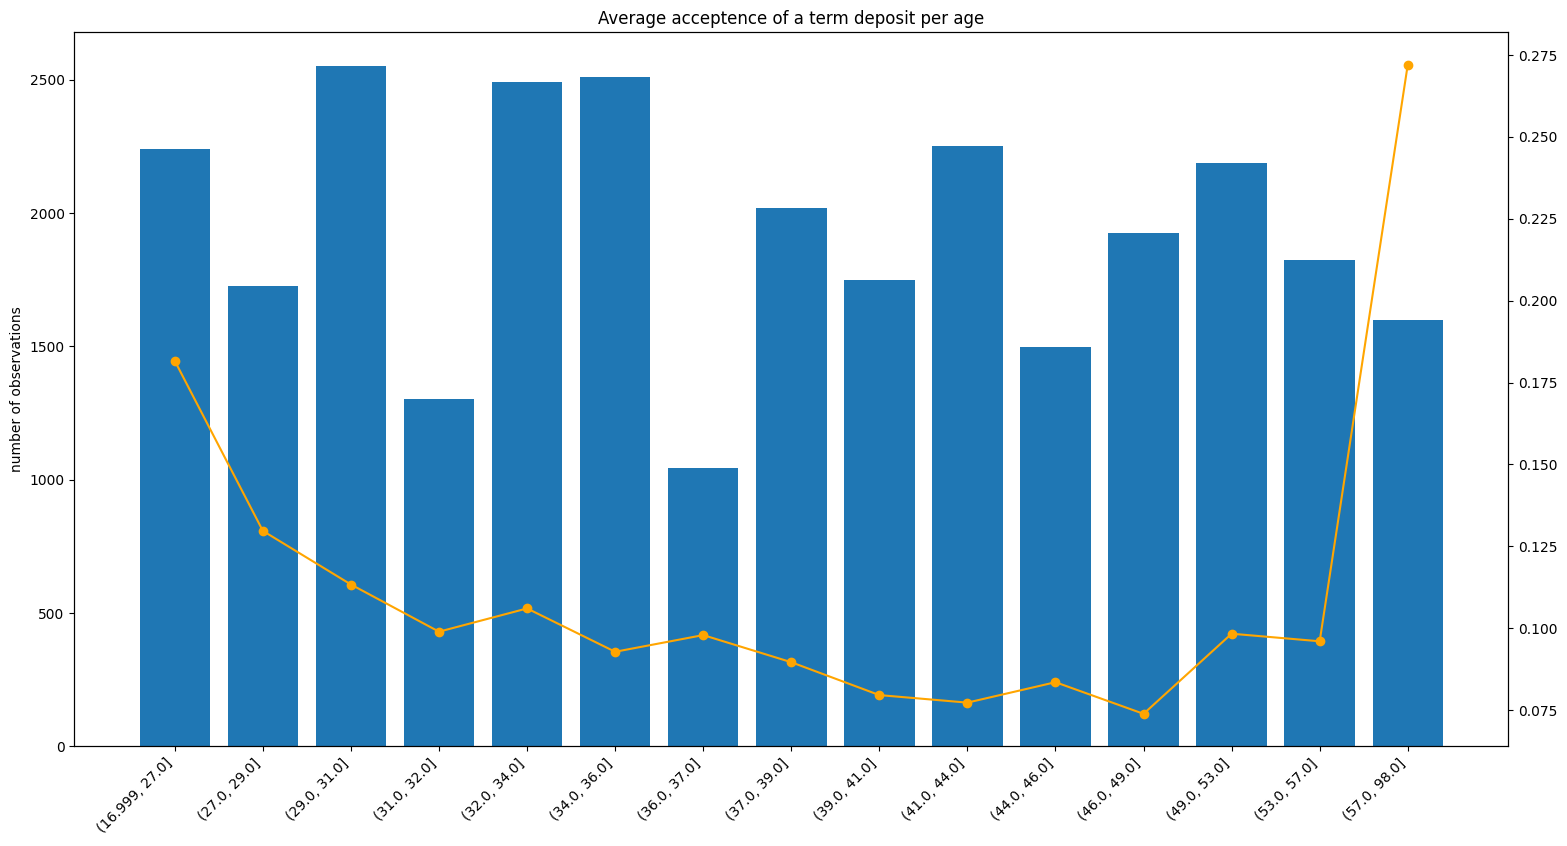

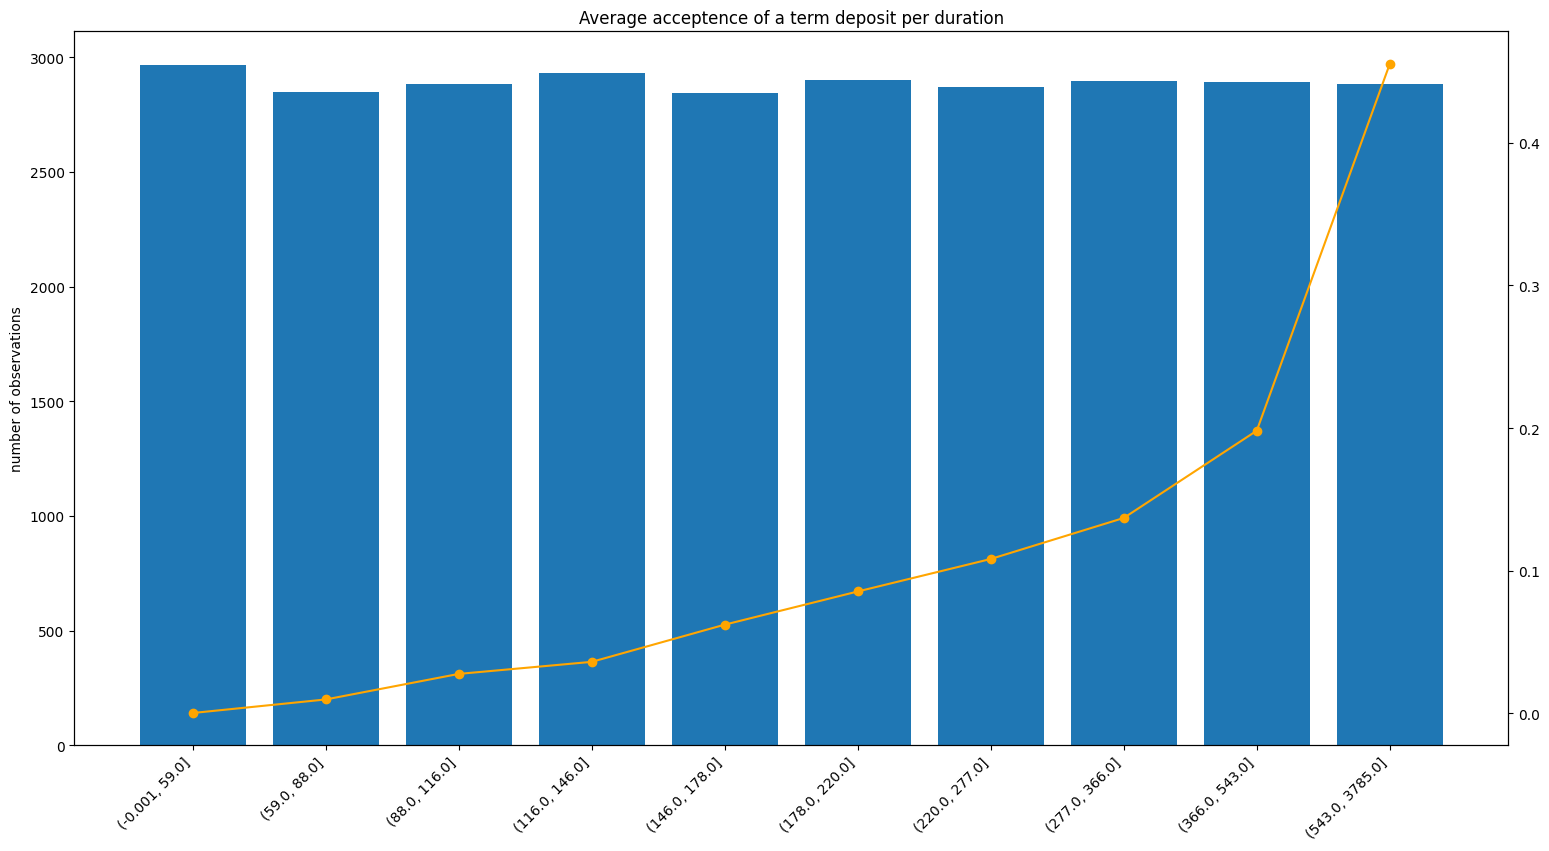

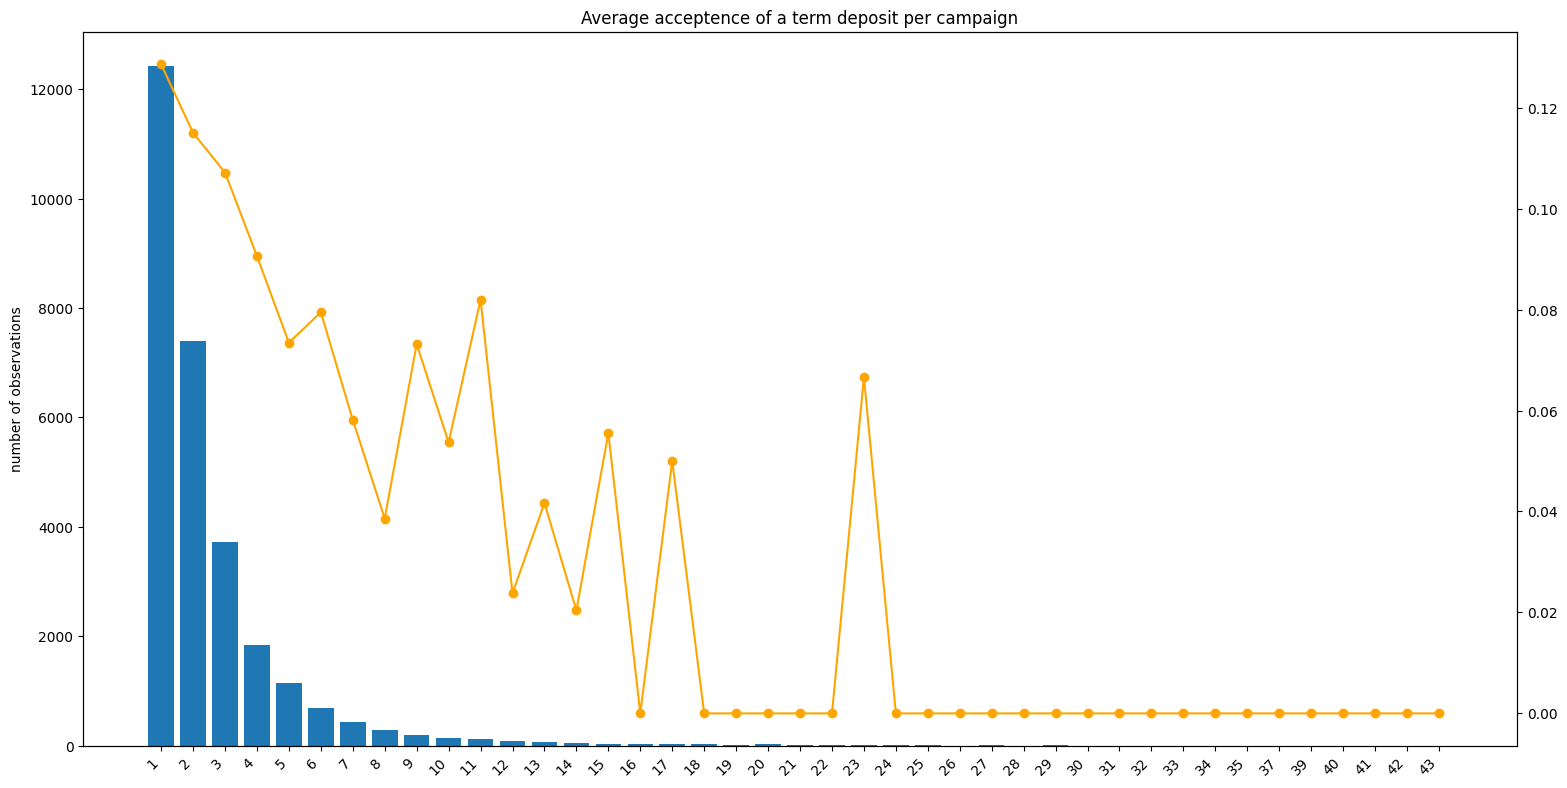

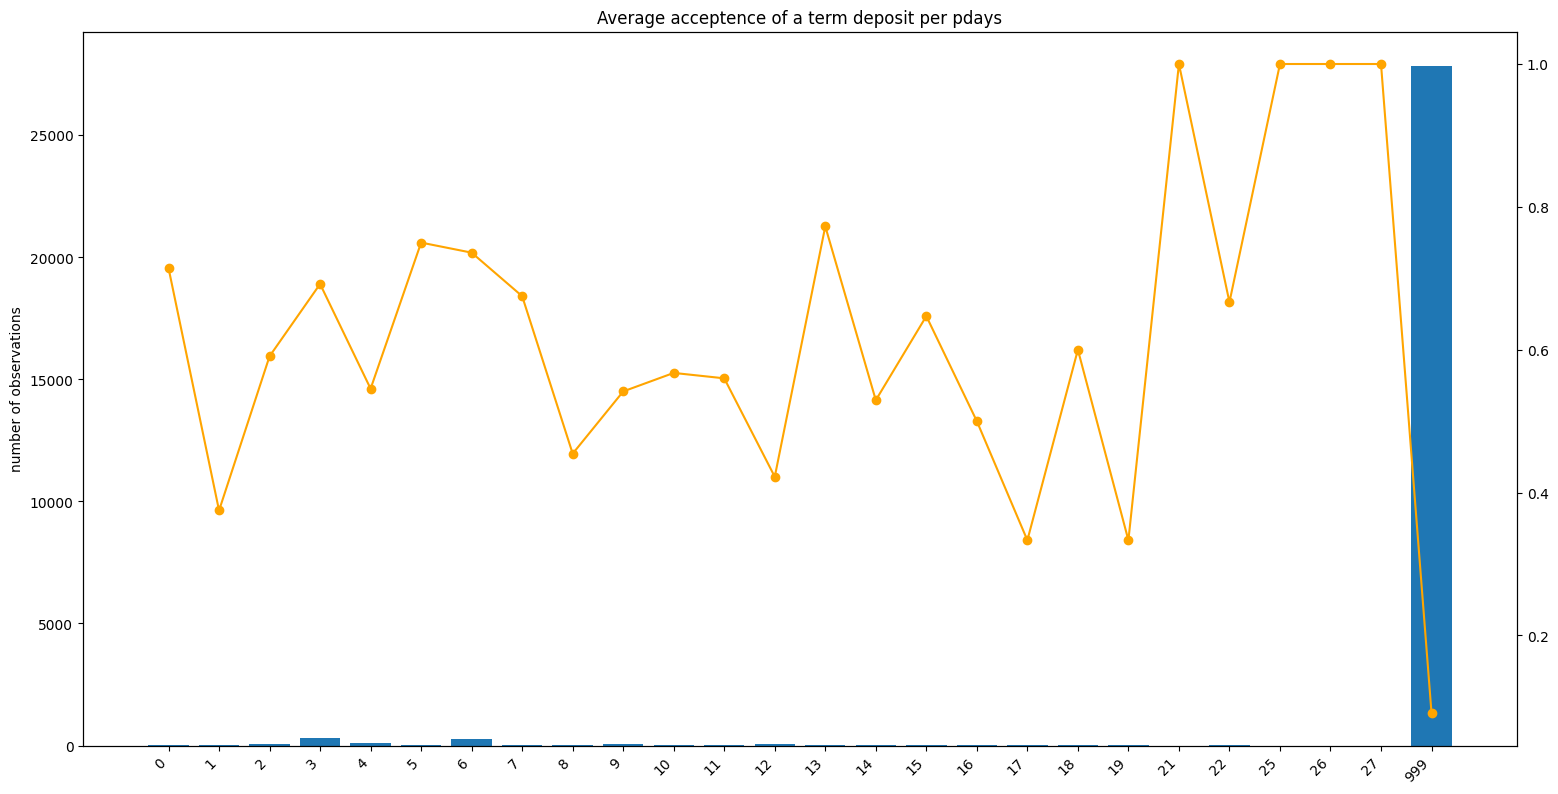

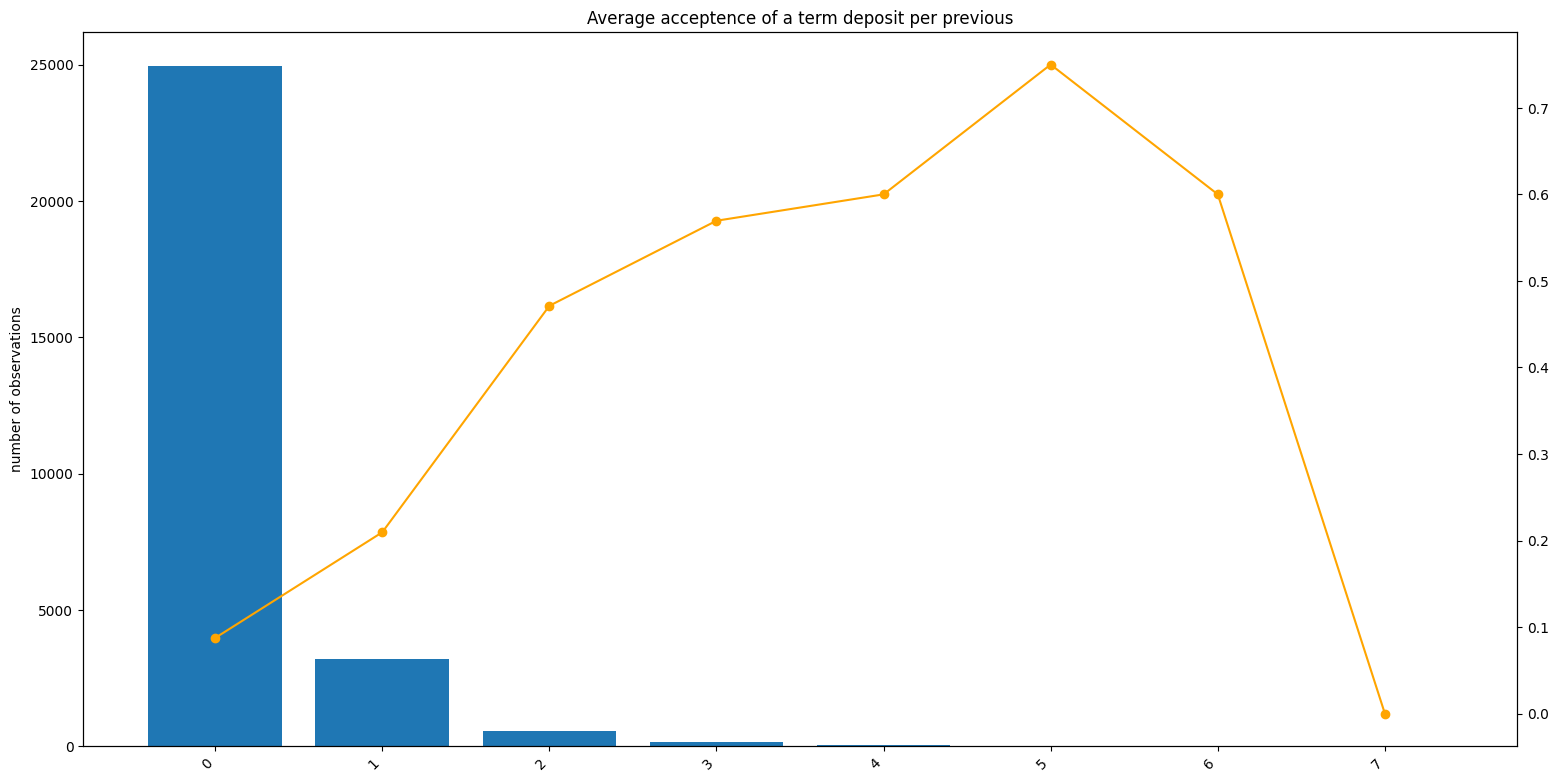

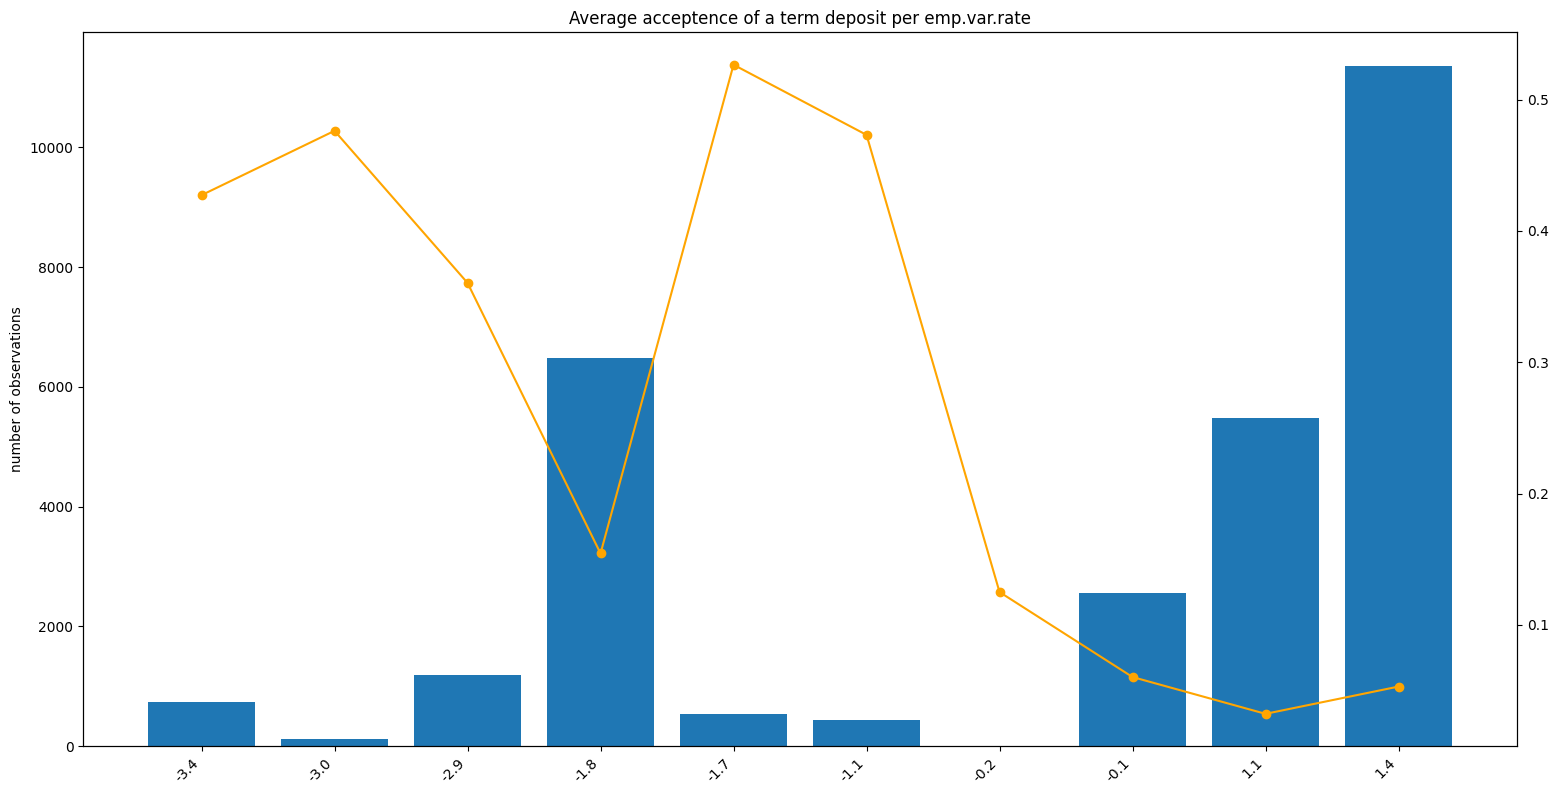

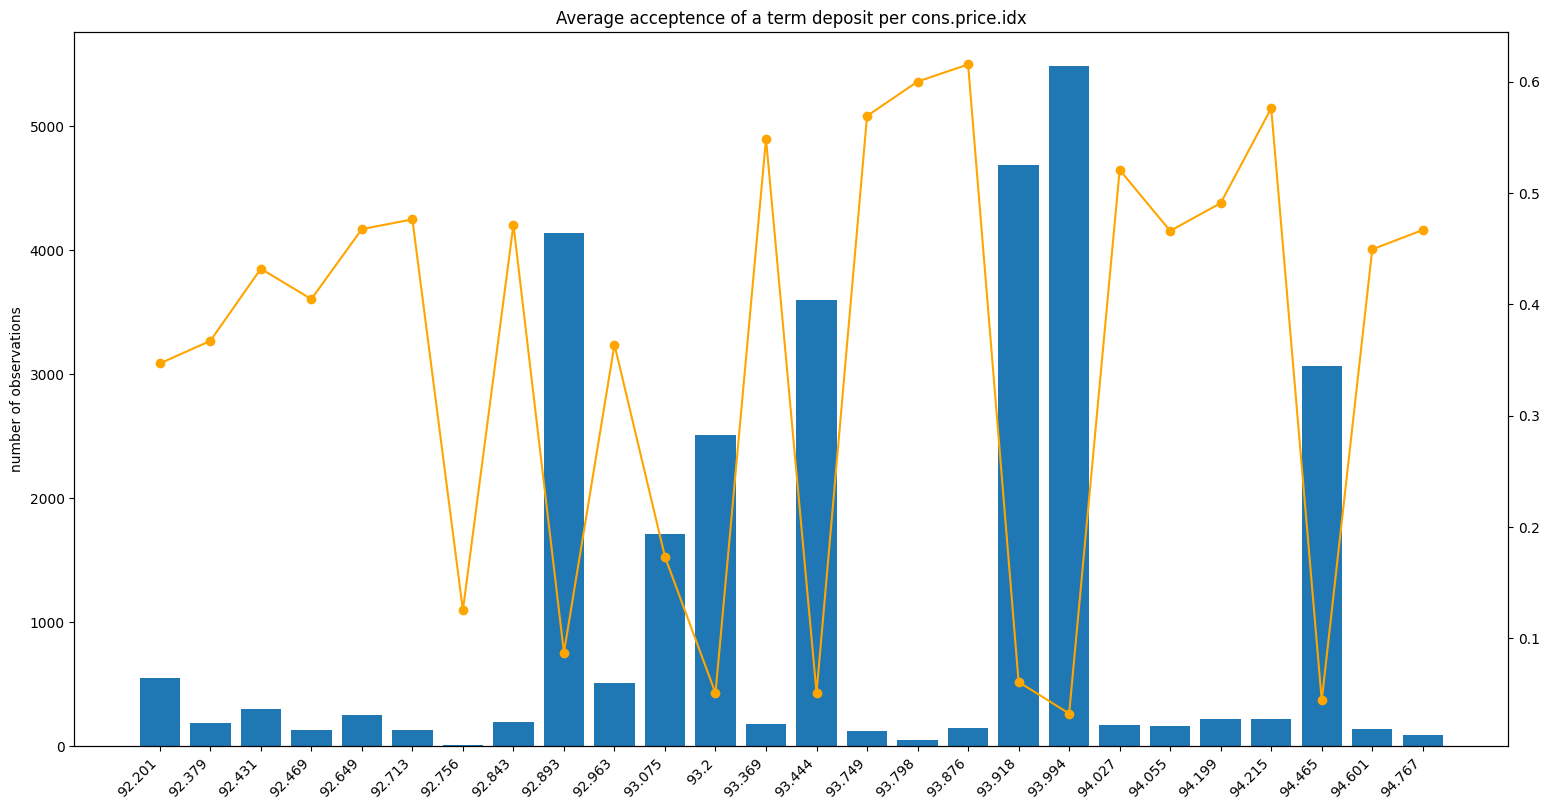

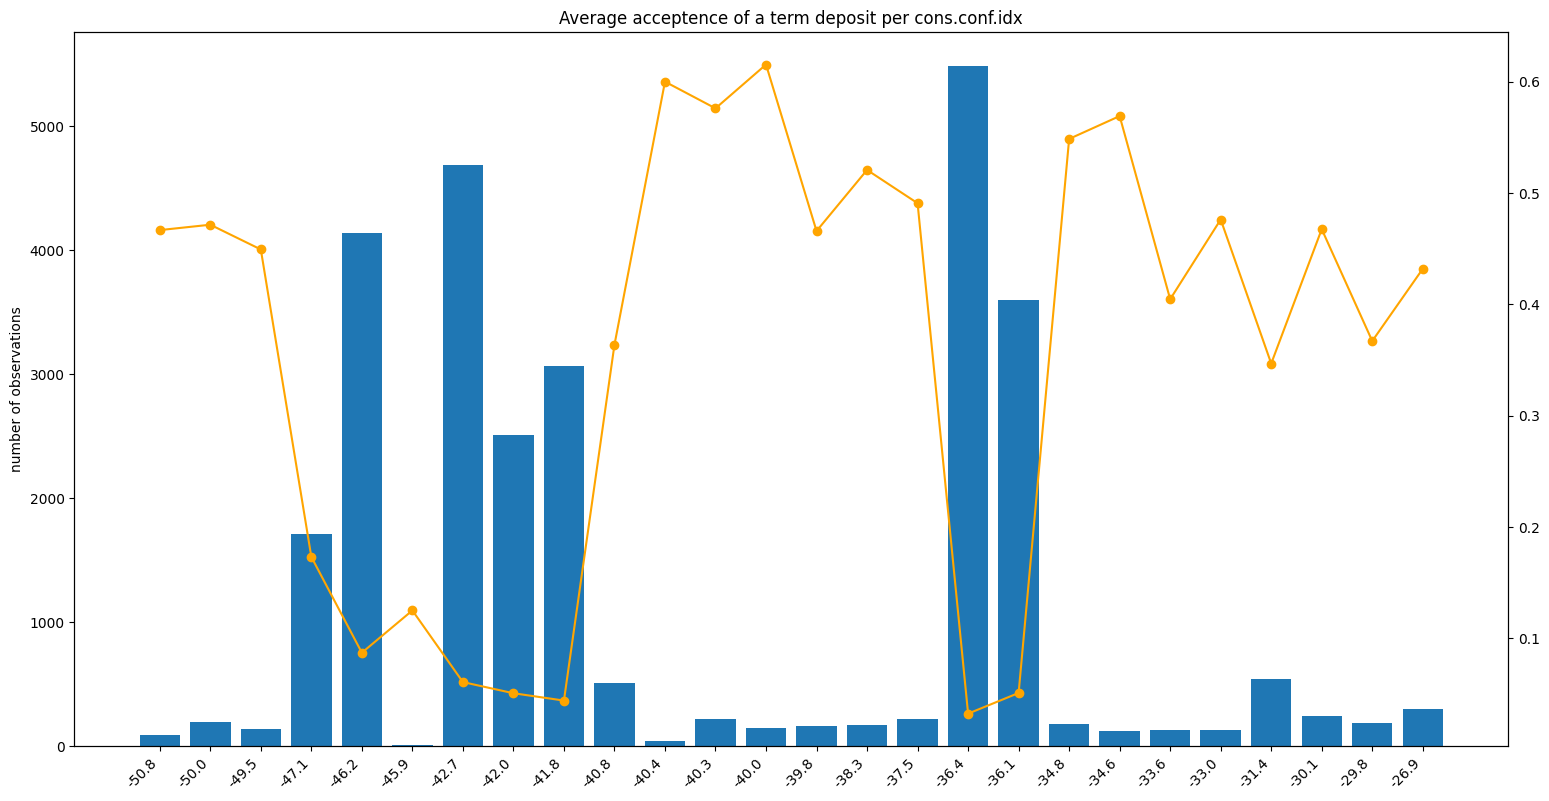

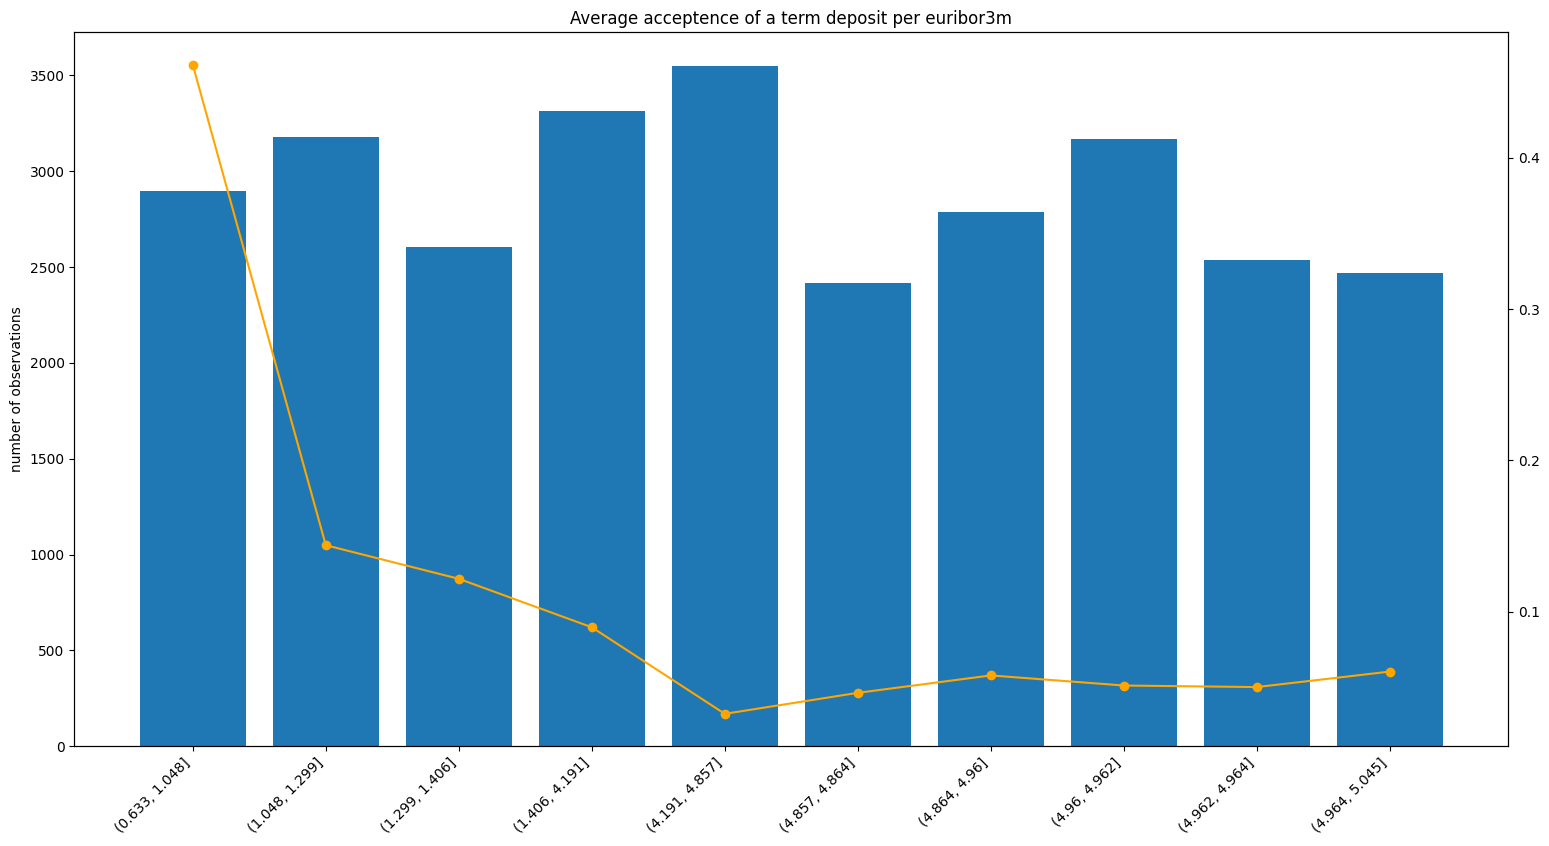

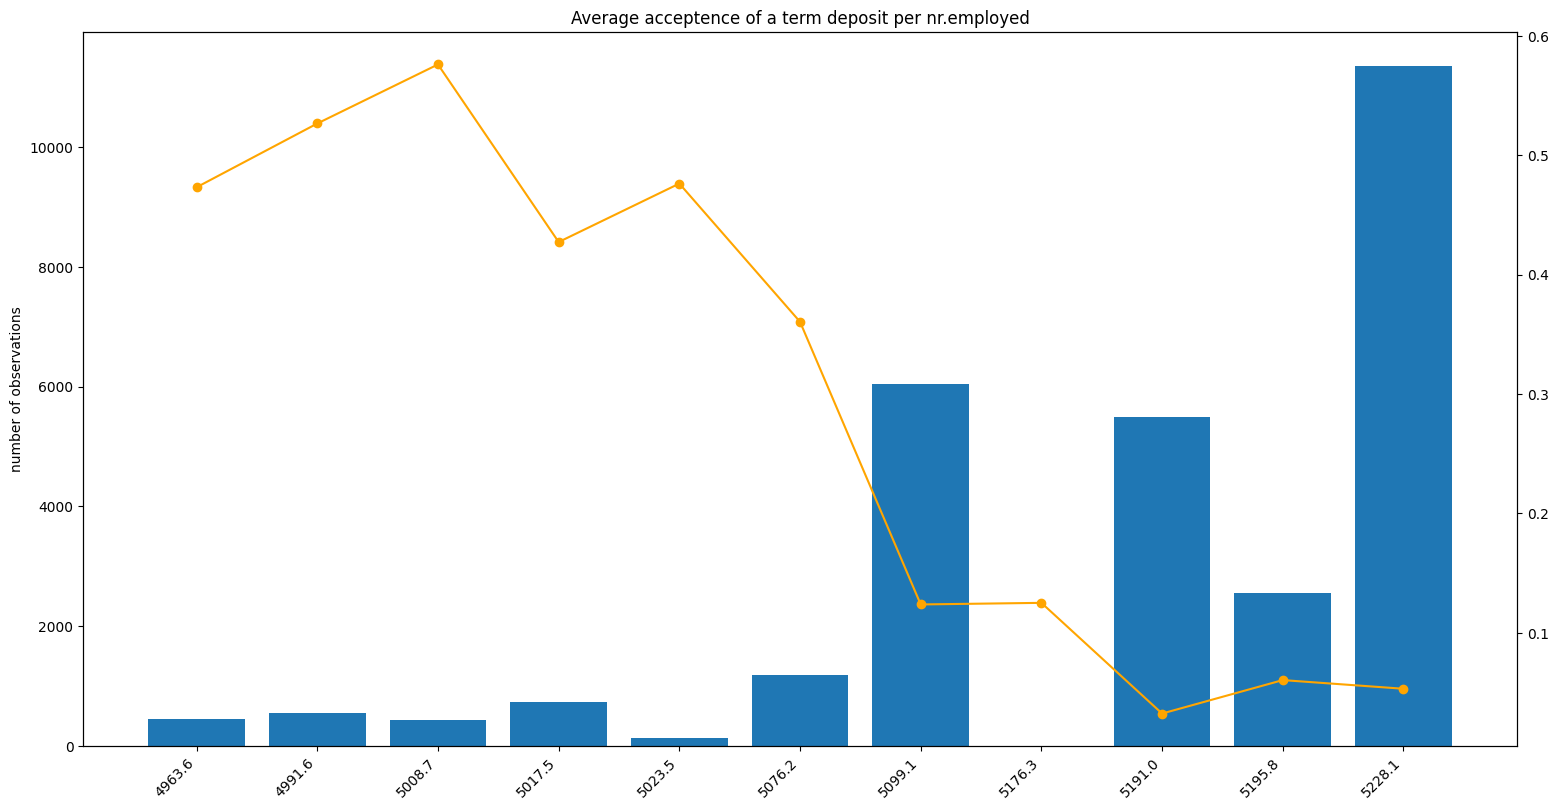

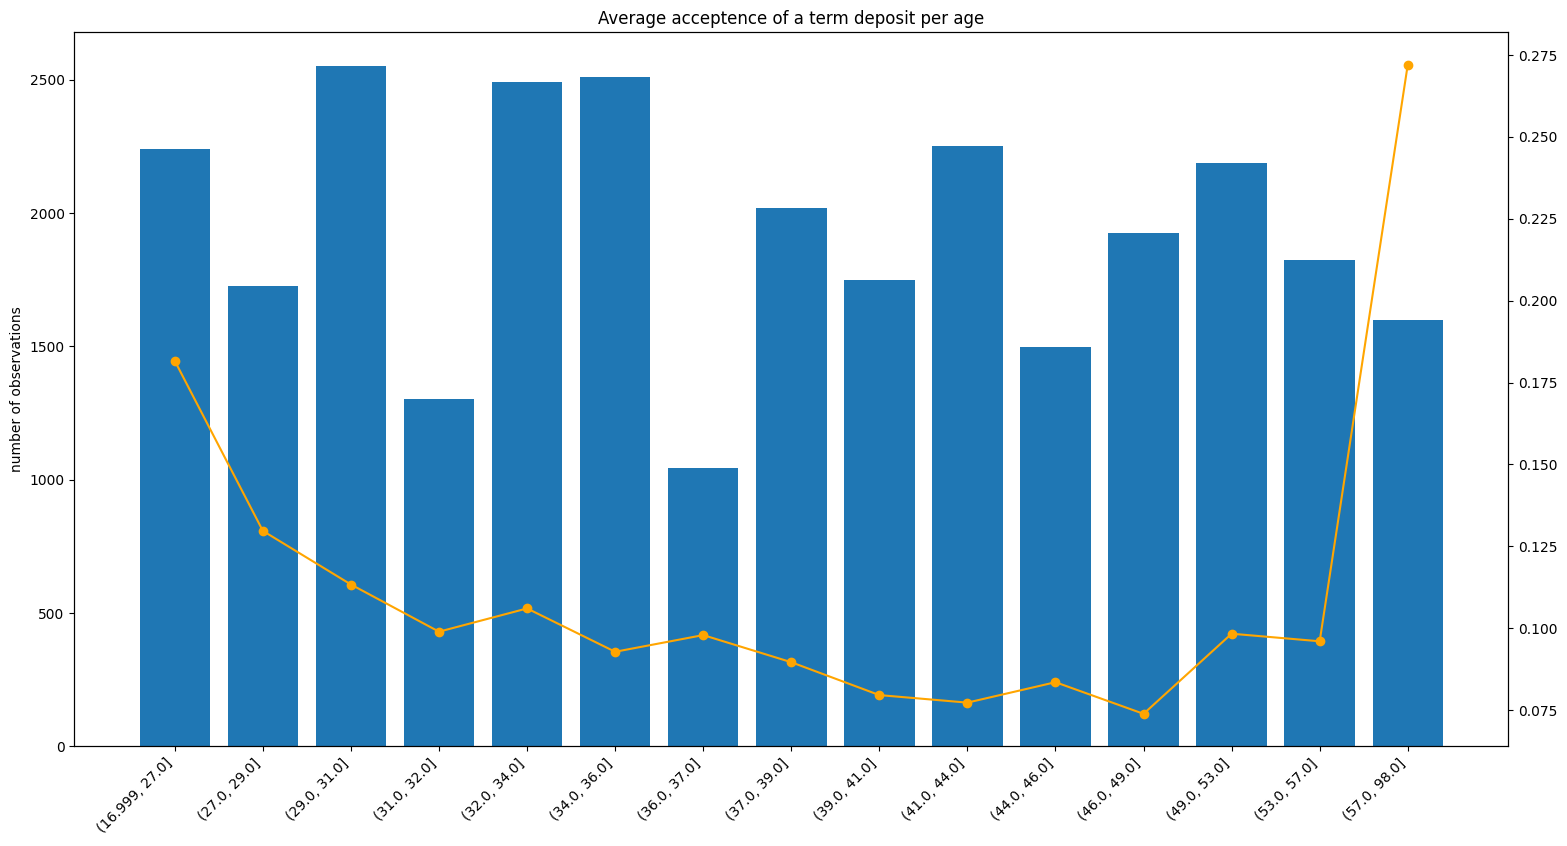

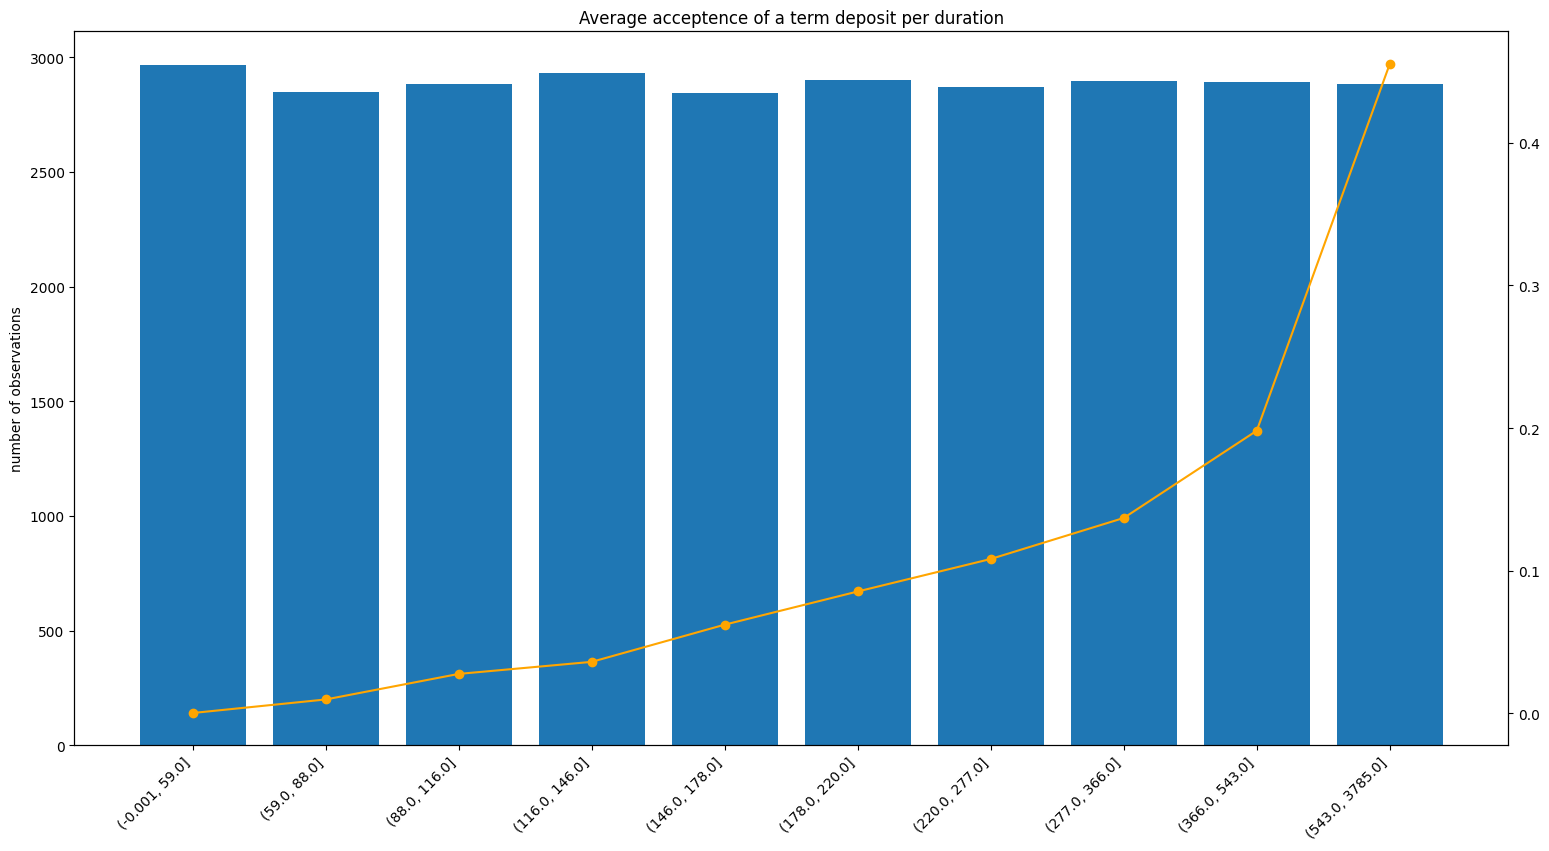

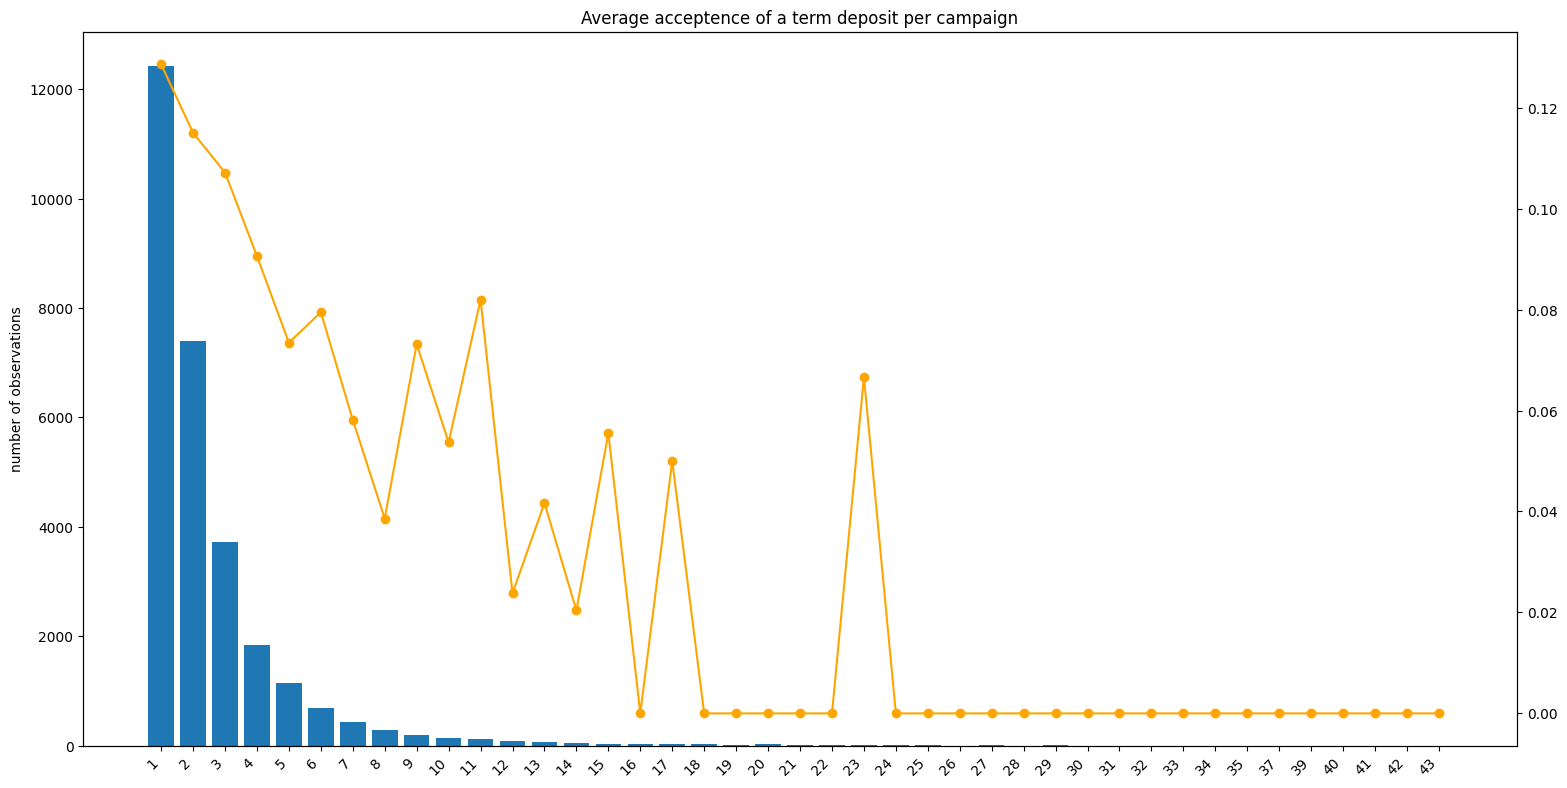

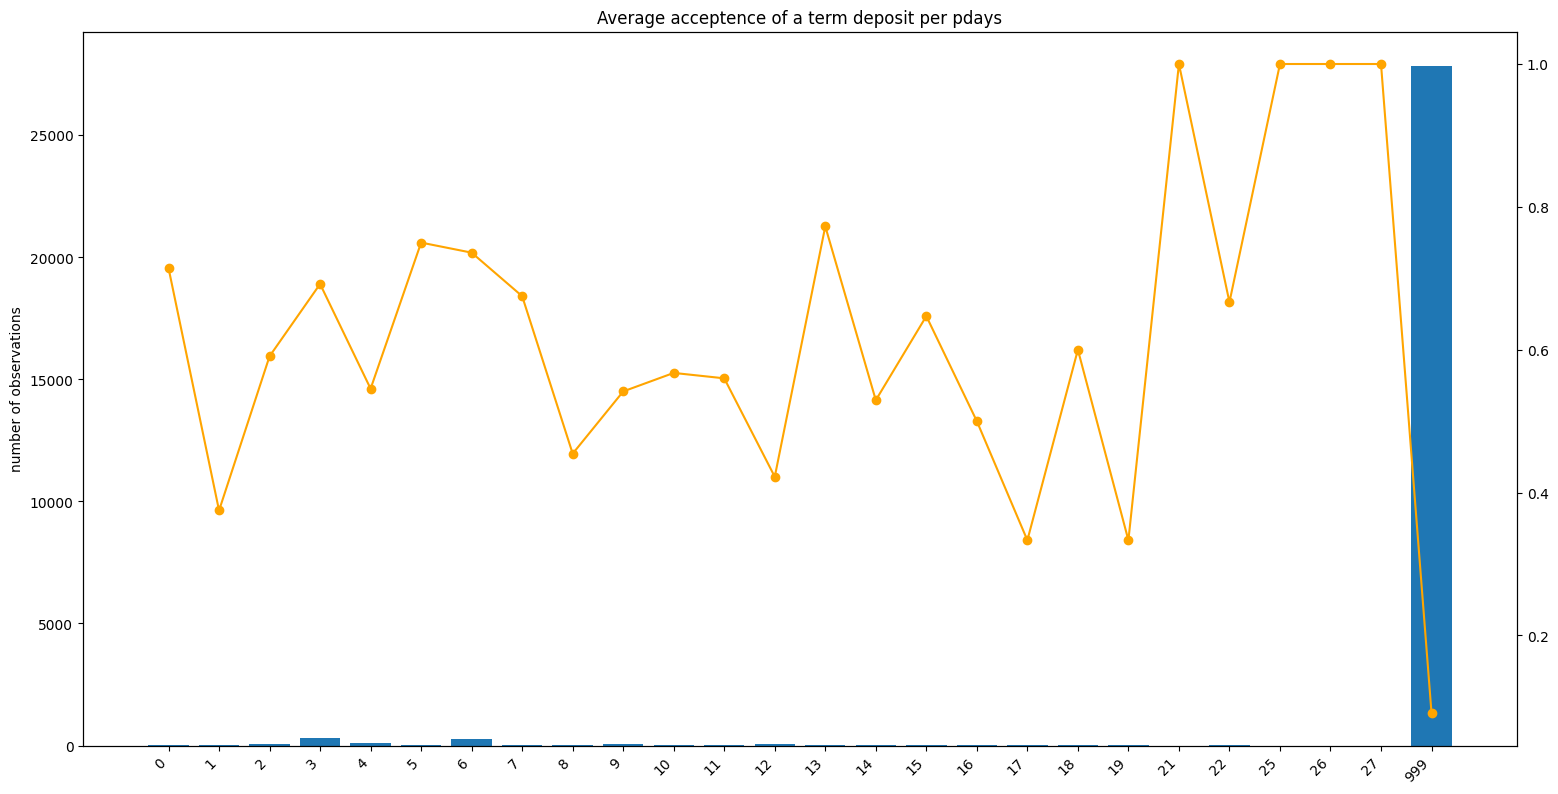

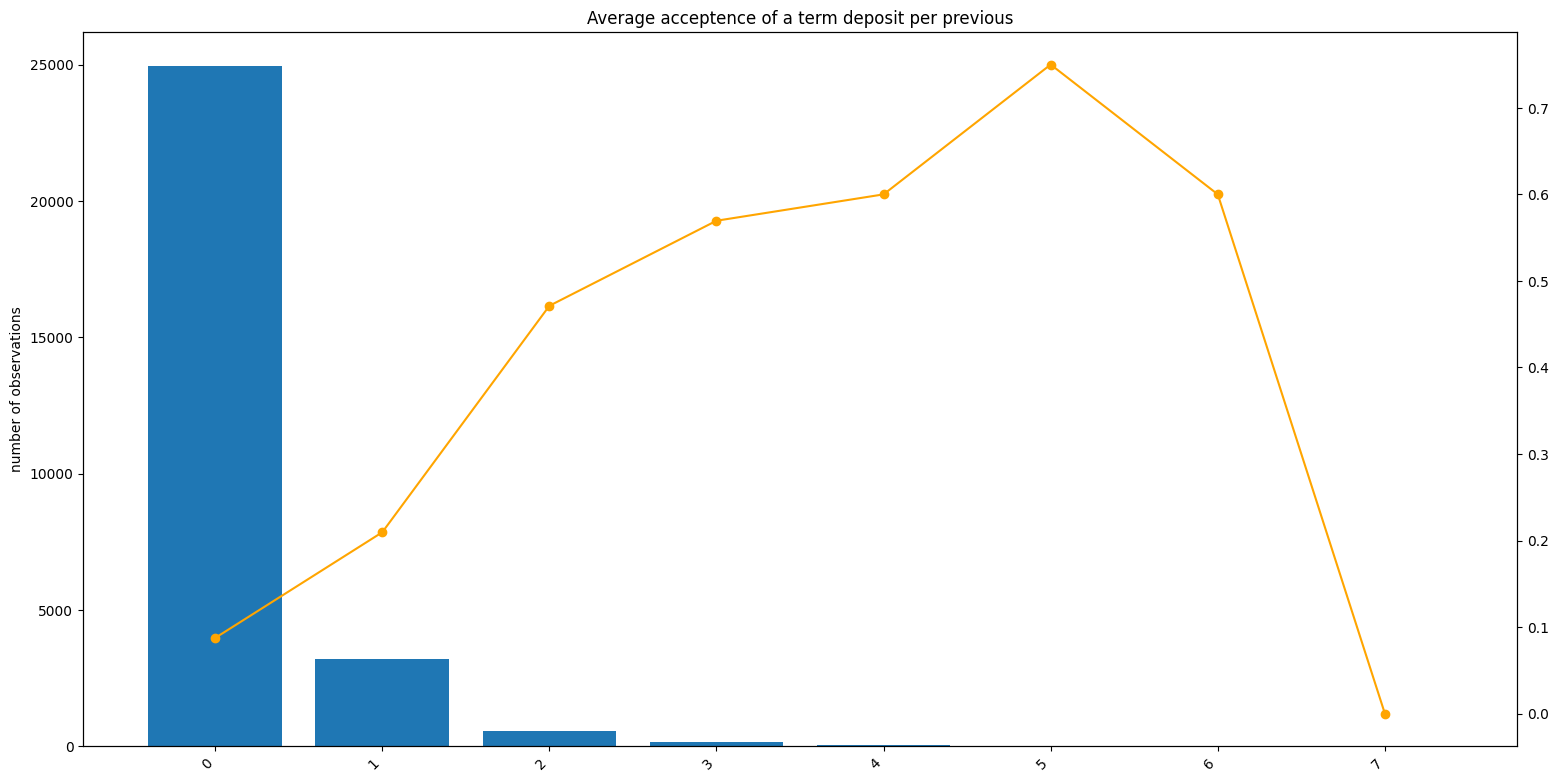

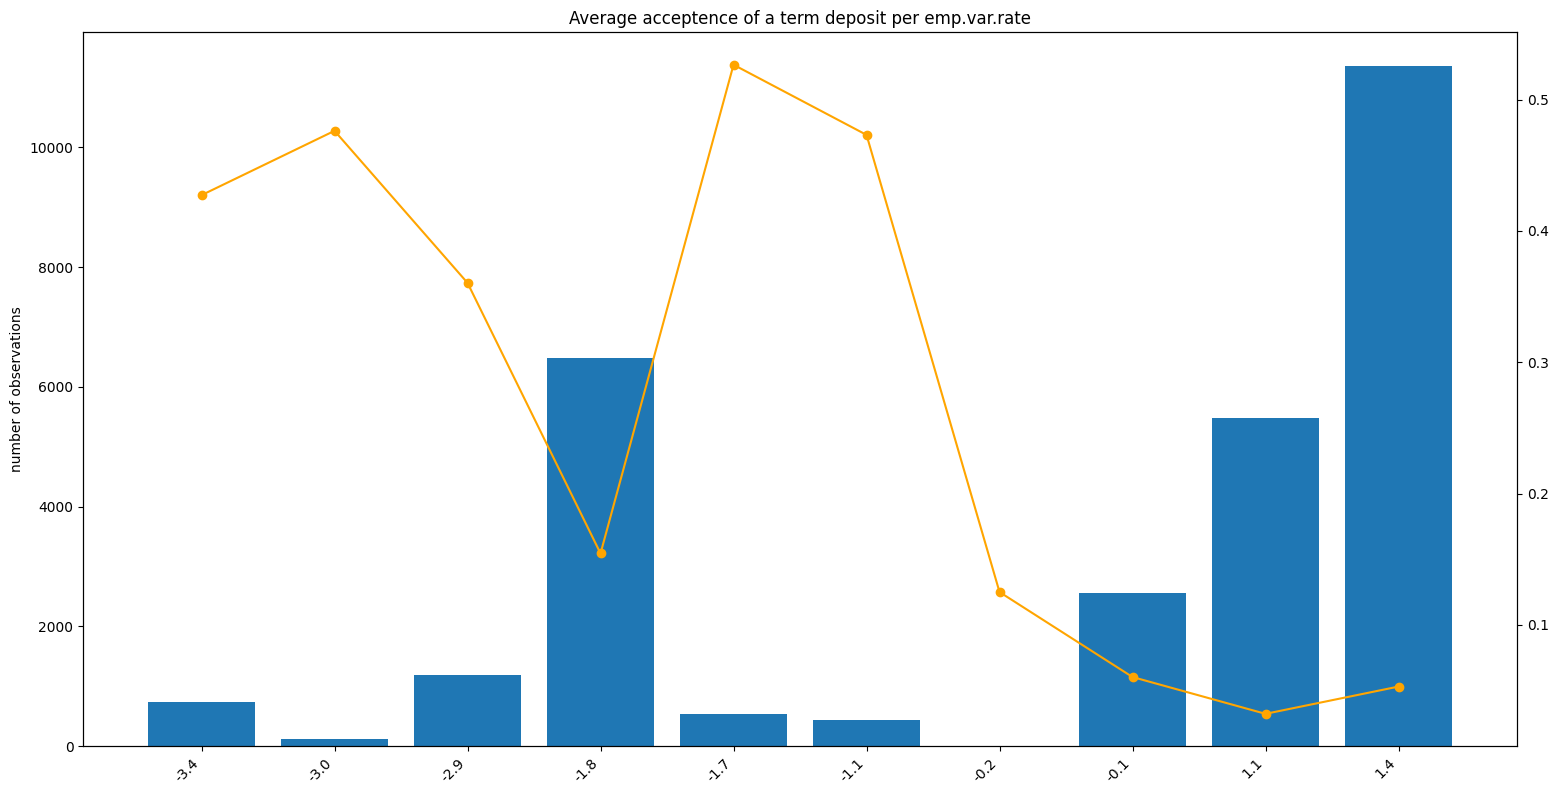

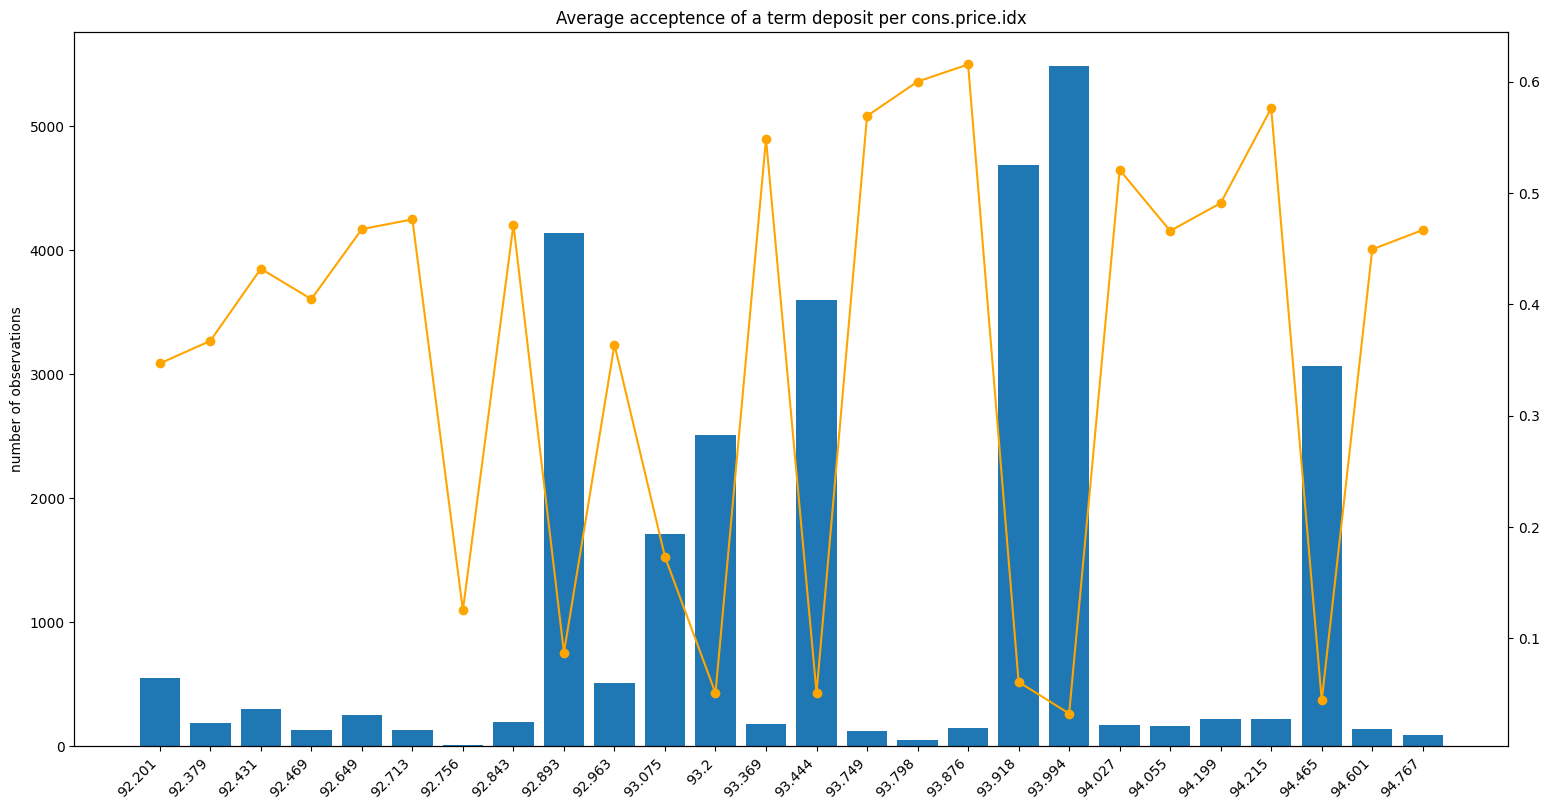

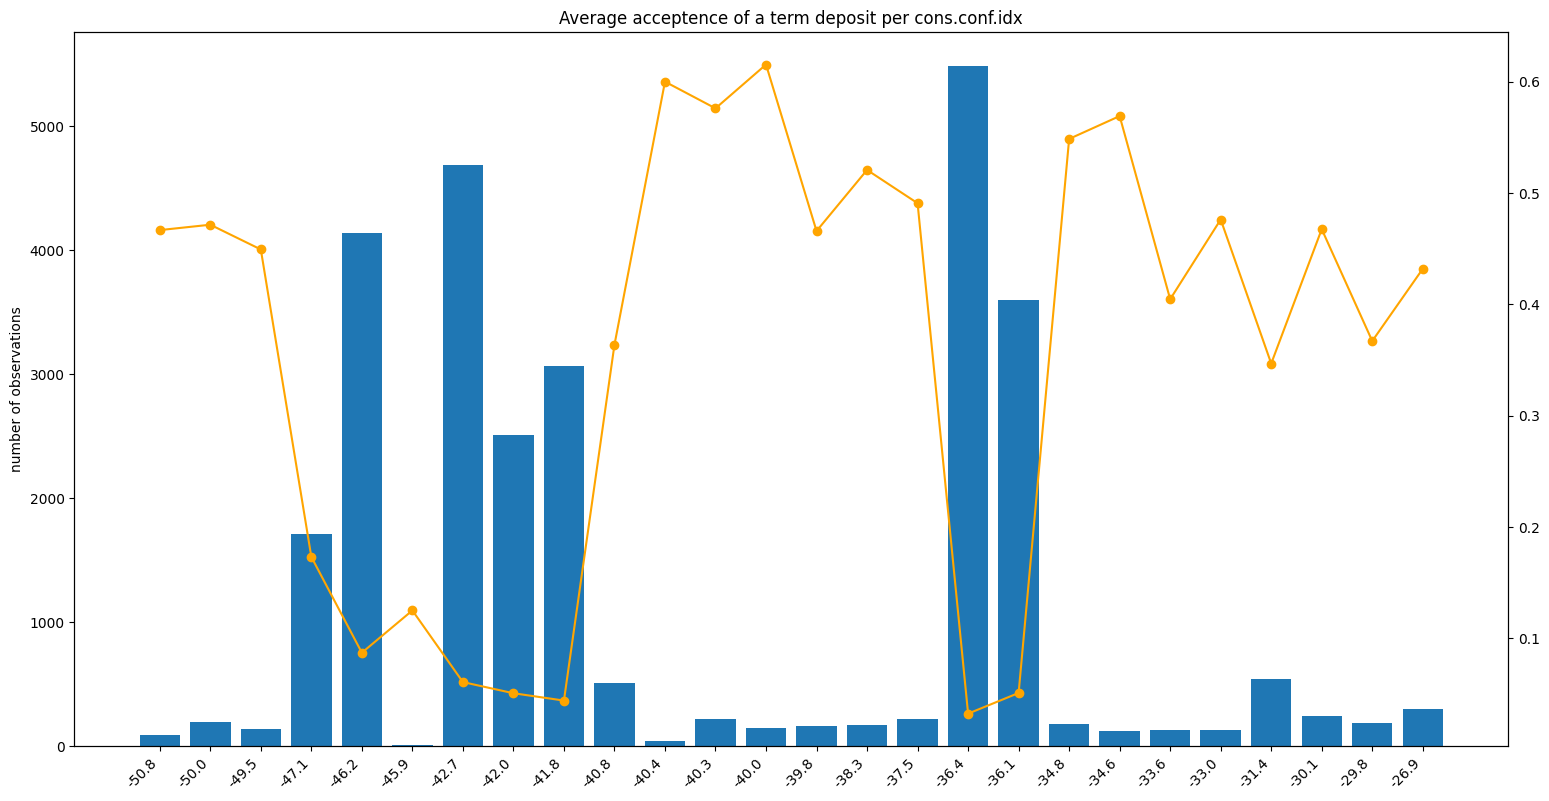

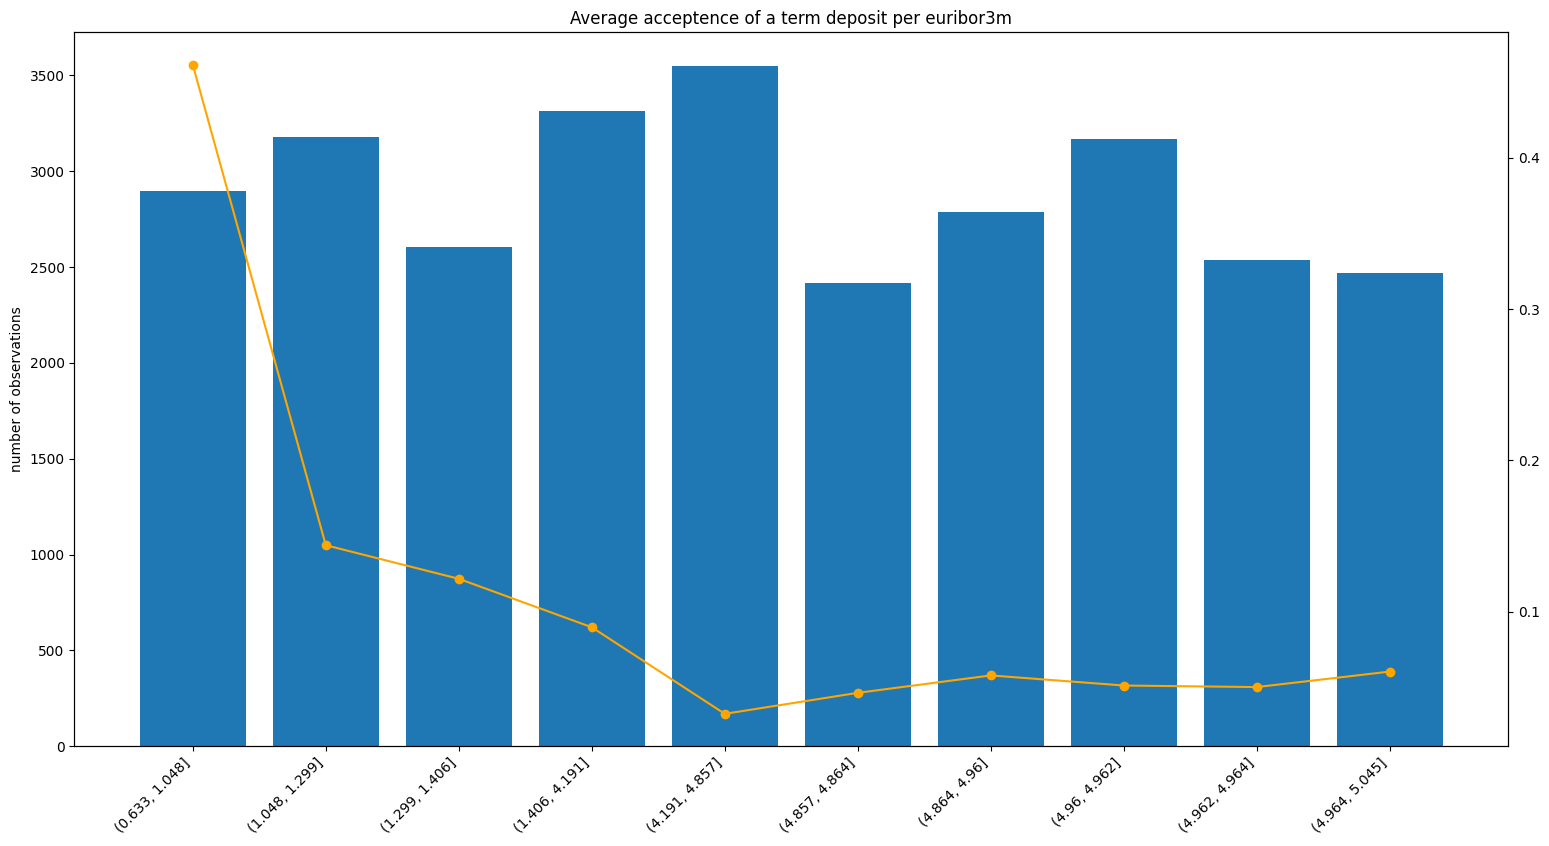

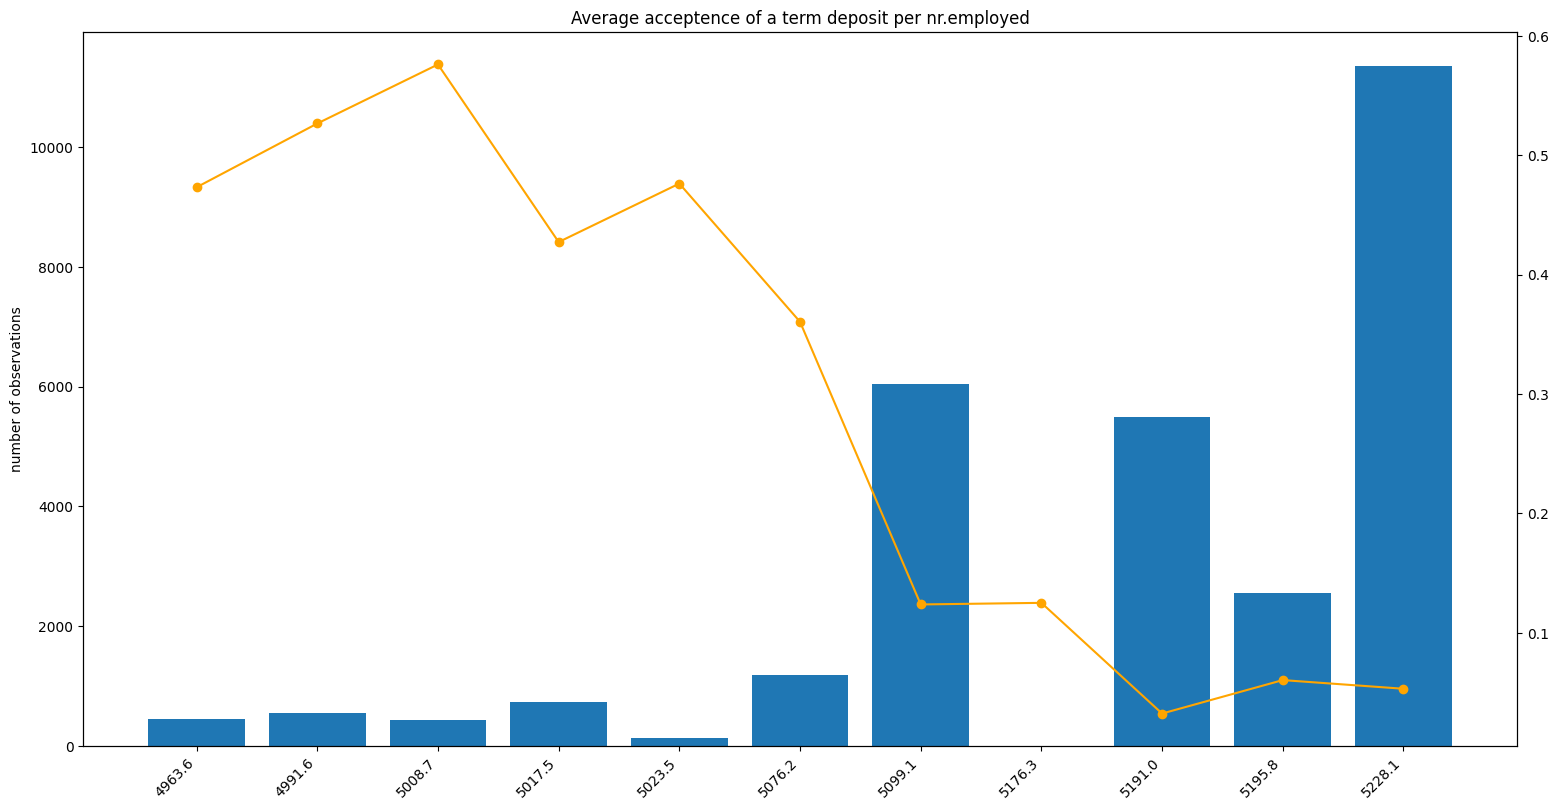

In [10]:
plot_numcol_vs_target("age",15)
plot_numcol_vs_target("duration",10)
plot_col_vs_target('campaign')
plot_col_vs_target('pdays')
plot_col_vs_target("previous")
plot_col_vs_target('emp.var.rate')
plot_col_vs_target("cons.price.idx")
plot_col_vs_target("cons.conf.idx")
plot_numcol_vs_target('euribor3m',10)
plot_col_vs_target("nr.employed")

In [11]:
#First analysis of variables: 

#Job:
#This variable seems useful, the highest converstion rate is among students and retired people. For students it is maybe the first account and retired people are 
#prob. buying this for their grandchildren

#Marital:
#This variable seems useful as well, the conversion rate is the highest among single people, proably because they dont need to consult with their partners for
#financial decisions

#Education: 
#This variable seems useful as well, it appears the higher the education, the higher the conversion which is reasonable

#Defualt: 
#This variables also separates the conversions quite nicely. 

#Housing: 
#The conversion rate is very similar among the levels of this factor

#Loan:
#The conversion rate is very similar among the levels of this factor

#Contact: 
#Factor seems useful, I could not find out what "cellular contact" is supposed to be, I suppose it means personal contact

#Month:
#The conversion rate among levels of this variable seems random, also it there is no reasonable explanation why this should influence the target

#Day_of_week:
#The conversion rate among levels of this variable seems random, also it there is no reasonable explanation why this should influence the target

#poutcome
#This variable seems very useful, it makes a lot of sense that we have a very high retention for customers where we could already make a sale.

#age
#Seems very useful, there is probably some correlation with job (student, retired) but I will still include it. 
#Conversion rate seems decreasing and after a certain age increasing again -> feature engineering: include age and age^2

#Duration: 
#This variable is very predictive, but like it is in the instructions: the business-usability of this variable is questionable. The calls with people who bought the 
#product are probably long becasue they were interested and asking questions etc. 
#Also probably the intended use of the model is to find out which clients we can target for a sales campaing. And then this variable is useless because it is 
#not known beforehand. 
#I will leave it out of the model like it is suggested. 

#Campaing: 
#This variable seems useful, there is a decreasing conversion observable, we should probably not target clients who have declined several times already

#pdays: 
#This variable has almost no variance, I will leave it out

#previous:
#The description of this field is the same as campaing, although the contribution is completely different. 
#My guess is that this encodes number of products we could sell to this client before. 
#It seems quite predictive

#employement variation rate:
#There is a clear connection between this variable and the conversion. High employment variation is an indicator of a recession where people are generally more tight 
#with money-> very low conversion seems reasonable
#I will include this factor, seems very useful

#cons.price.idx
#There is no apparent connection with the target

#cons.conf.idx
#There is no apparent connection with the target

#Euribor 3m
#It seems there is a higher conversion when the interest rates are low
#Maybe during high interest rates periods, people can find more lucrative finance products

#Nr. employees
#Is this the number of employees of the bank?
# I will leave it out

In [12]:
#sum(bank_data_train["default"]=="unknown")
bank_data_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [13]:
#Feature engineering


default_clean = bank_data_train["default"].map({"no":"no", "yes":"yes_or_unknown", "unknown":"yes_or_unknown","yes_or_unknown":"yes_or_unknown"})
marital_clean = bank_data_train["marital"].map({'married':'married', 'single':'single', 'divorced':'divorced', 'unknown':'single'})
education_dict = {level:level for level in bank_data_train["education"].unique()}
education_dict['unknown'] = 'other'
education_dict['illiterate'] = 'other'
print(education_dict)
education_clean = bank_data_train["education"].map(education_dict)

othercols = [bank_data_train[col] for col in bank_data_train.columns if col not in ["default", "marital", "education"]]


bank_data_train = pd.concat(othercols + [default_clean, marital_clean, education_clean], axis=1)


categorical_cols_in_model = ['job', 'marital', 'education', 'default', 'contact', 'poutcome']


{'basic.4y': 'basic.4y', 'high.school': 'high.school', 'basic.6y': 'basic.6y', 'professional.course': 'professional.course', 'unknown': 'other', 'basic.9y': 'basic.9y', 'university.degree': 'university.degree', 'illiterate': 'other'}


In [14]:
#Feature engineering
#Feature engineering of categorical columns


from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')

cat_encoder.fit(bank_data_train[categorical_cols_in_model])

enc = cat_encoder.transform(bank_data_train[categorical_cols_in_model])
enc = pd.DataFrame(enc)
enc.columns = cat_encoder.get_feature_names_out()

enc.head()

enc.shape

enc.index

C:\Users\vlg8764\Data_Science_Masterclass\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RangeIndex(start=0, stop=28913, step=1)

In [15]:
#Feature engineering of 

age = bank_data_train["age"]
age_squared = bank_data_train["age"]*bank_data_train["age"]
age_squared.name = "age_squared"
campaign = bank_data_train["campaign"]
previous = bank_data_train["previous"]
empvarrate = bank_data_train["emp.var.rate"]
euribor_3m = bank_data_train["euribor3m"]

numeric_cols = [age, age_squared, campaign, previous, empvarrate, euribor_3m]

bank_data_train_numeric_cols = pd.concat(numeric_cols, axis=1)

numeric_cols = [bank_data_train_numeric_cols[col] for col in bank_data_train_numeric_cols.columns]
categorical_cols = [enc[col] for col in enc.columns]

all_columns = numeric_cols + categorical_cols

bank_data_train_numeric_cols.index = range(0,28913)

X_train = pd.concat([bank_data_train_numeric_cols,enc], axis=1, ignore_index=True)
X_train.head(10)
y_train = bank_data_train["target"]

print(bank_data_train_numeric_cols.shape)
print(enc.shape)
print(X_train.shape)
print(enc.index)
bank_data_train_numeric_cols.index = range(0,28913)
print(bank_data_train_numeric_cols.index)

(28913, 6)
(28913, 23)
(28913, 29)
RangeIndex(start=0, stop=28913, step=1)
RangeIndex(start=0, stop=28913, step=1)


In [16]:
#Fitting a model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [17]:
y_train_hat = lr.predict_proba(X_train)
y_train_hat = y_train_hat[:,1]

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_train_hat)

0.7760870598695281

In [19]:
#Feature engineering for the test data

default_clean_test = bank_data_test["default"].map({"no":"no", "yes":"yes_or_unknown", "unknown":"yes_or_unknown","yes_or_unknown":"yes_or_unknown"})
marital_clean_test = bank_data_test["marital"].map({'married':'married', 'single':'single', 'divorced':'divorced', 'unknown':'single'})

education_clean_test = bank_data_test["education"].map(education_dict)

#othercols = [bank_data_test[col] for col in bank_data_test.columns if col not in ["default", "marital", "education"]]

othercols_test = [bank_data_test[col] for col in bank_data_test.columns if col not in ["default", "marital", "education"]]
bank_data_test = pd.concat(othercols_test + [default_clean_test, marital_clean_test, education_clean_test], axis=1)



enc_test = cat_encoder.transform(bank_data_test[categorical_cols_in_model])
enc_test = pd.DataFrame(enc_test)
enc_test.columns = cat_encoder.get_feature_names_out()

enc_test.index

age_test = bank_data_test["age"]
age_squared_test = bank_data_test["age"]*bank_data_test["age"]
age_squared_test.name = "age_squared"
campaign_test = bank_data_test["campaign"]
previous_test = bank_data_test["previous"]
empvarrate_test = bank_data_test["emp.var.rate"]
euribor_3m_test = bank_data_test["euribor3m"]

numeric_cols_test = [age_test, age_squared_test, campaign_test, previous_test, empvarrate_test, euribor_3m_test]

bank_data_test_numeric_cols = pd.concat(numeric_cols_test, axis=1)

numeric_cols = [bank_data_train_numeric_cols[col] for col in bank_data_train_numeric_cols.columns]
categorical_cols = [enc[col] for col in enc.columns]

all_columns = numeric_cols + categorical_cols

bank_data_test_numeric_cols.index = range(0,12275)

X_test = pd.concat([bank_data_test_numeric_cols,enc_test], axis=1, ignore_index=True)
X_test.head(10)
y_test = bank_data_test["target"]

In [20]:
bank_data_test.shape

(12275, 22)

In [21]:
y_test_hat = lr.predict_proba(X_test)
y_test_hat = y_test_hat[:,1]
roc_auc_score(y_test, y_test_hat)

0.7698195057209831

In [22]:
#The auc score is not excellent but stil acceptable. Also the fact that it is very similar between the training and testing sample 
#indicates that there is no overfit and we seem to capture the general patterns quite well.

In [23]:
#Coefficients of the model

column_labels = bank_data_test_numeric_cols.columns.tolist() + enc_test.columns.tolist()
coef = lr.coef_.squeeze().tolist()

# Verify the result
for i in range(0, len(column_labels)):
    print(column_labels[i] + " " + str(coef[i]))



age -0.06652666432297147
age_squared 0.00079575588082095
campaign -0.05482491527368133
previous 0.20019772255959414
emp.var.rate 0.02749822173283679
euribor3m -0.4051249478732808
job_blue-collar -0.4614341795560617
job_entrepreneur -0.09702164872248394
job_housemaid -0.005321881401148548
job_management -0.05174819566196664
job_retired 0.14364760739854177
job_self-employed -0.005175642094626863
job_services -0.313086958184292
job_student 0.29651909403045573
job_technician -0.042732457887905806
job_unemployed 0.13477134426432116
job_unknown 0.03477703326640104
marital_married 0.16723232074573097
marital_single 0.10623057876858978
education_basic.6y -0.007325454510868077
education_basic.9y -0.17762877411133599
education_high.school 0.019383982112653526
education_other 0.15367328776134767
education_professional.course 0.1051032323191614
education_university.degree 0.10902812787508012
default_yes_or_unknown -0.5892001339544701
contact_telephone -0.31830842146983374
poutcome_nonexistent 0.54

In [24]:



treshholds = [i/100 for i in range(0,50)] 

true_positives_per_th = []
false_positives_per_th = []
true_negatives_per_th = []
false_negatives_per_th = []

recall_per_th = []
precision_per_th = []

for i in range(0,len(treshholds)):
    true_positives = sum((y_train == 1) & (y_train_hat > treshholds[i]))
    false_positives = sum((y_train != 1) & (y_train_hat > treshholds[i]))
    true_negatives = sum((y_train != 1) & (y_train_hat <= treshholds[i]))
    false_negatives = sum((y_train == 1) & (y_train_hat <= treshholds[i]))
    true_positives_per_th.append(true_positives)
    false_positives_per_th.append(false_positives)
    true_negatives_per_th.append(true_negatives)
    false_negatives_per_th.append(false_negatives)

    recall_per_th.append(true_positives/(true_positives+false_negatives))
    precision_per_th.append(true_positives/(true_positives+false_positives))

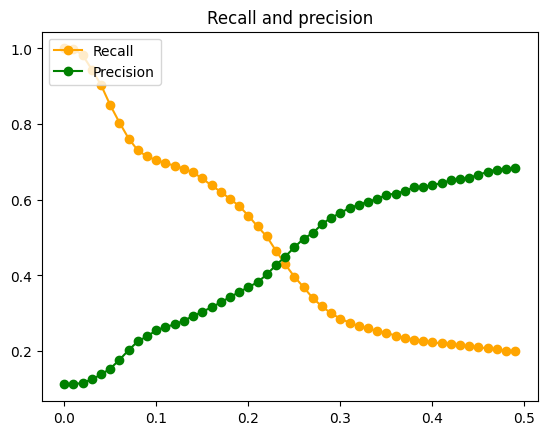

In [32]:
fig, ax1 = plt.subplots()
ax1.set_title("Recall and precision")
ax1.plot(treshholds, recall_per_th, color="orange", marker="o", label="Recall")
ax1.plot(treshholds,precision_per_th, color = "green", marker="o",label="Precision")
ax1.legend(loc="upper left")

In [26]:
#Analysing the precision and recall is a good indicator for where to set the thereshhold for classifying potential clients. 
#The optimal treshhold seems to be between 0.2 and 0.3
print(recall_per_th[23])
print(precision_per_th[23])

#For instance at threshhold of 0.23 we are able to detect 46.5 % of all clients who are willing to buy the product.
#And for each client we contact (acording to this classification) we are able to sell in 42.7 % of cases.

#Therefor I will use this treshhold.

0.46567717996289426
0.42699177771477176


In [27]:
#Checking the performance more detailed on the test set
y_test_classified = y_test_hat > 0.23

In [28]:
sum(y_test_classified)

1502

In [29]:
true_positives = sum((y_test == 1) & (y_test_classified == 1))
false_positives = sum((y_test != 1) & (y_test_classified == 1))
true_negatives = sum((y_test != 1) & (y_test_classified != 1))
false_negatives = sum((y_test == 1) & (y_test_classified != 1))

In [33]:
class_mat = [[true_positives, false_positives],[false_negatives, true_negatives]]

def printMatrix(s):

    for i in range(len(s)):
        for j in range(len(s[0])):
            print("%5d " % (s[i][j]), end="")
        print('\n')

printMatrix(class_mat)

  627   875 

  779  9994 



In [34]:
recall = true_positives/(true_positives+false_negatives)
precision = true_positives/(true_positives+false_positives)
print(recall)
print(precision)
#On the test set (=client sales campaign) we were able to aquire 627 new clients, 44,5 % of the 1502 targeted clients bought the product)
#Our board is happy with the results, the sales campaign was a success.


0.44594594594594594
0.4174434087882823
